In [2]:
import scanpy as sc

[Executed on 2023-10-26 14:20:24.476949]


In [3]:
#adata_subset=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset.h5ad")
adata=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated.h5ad")
known_cluster=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_repca.h5ad")
Satelite_glial_cells=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/satelite_glial_cell.h5ad")

[Executed on 2023-10-26 14:23:47.076595]


[Executed on 2023-10-26 12:54:54.092043]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


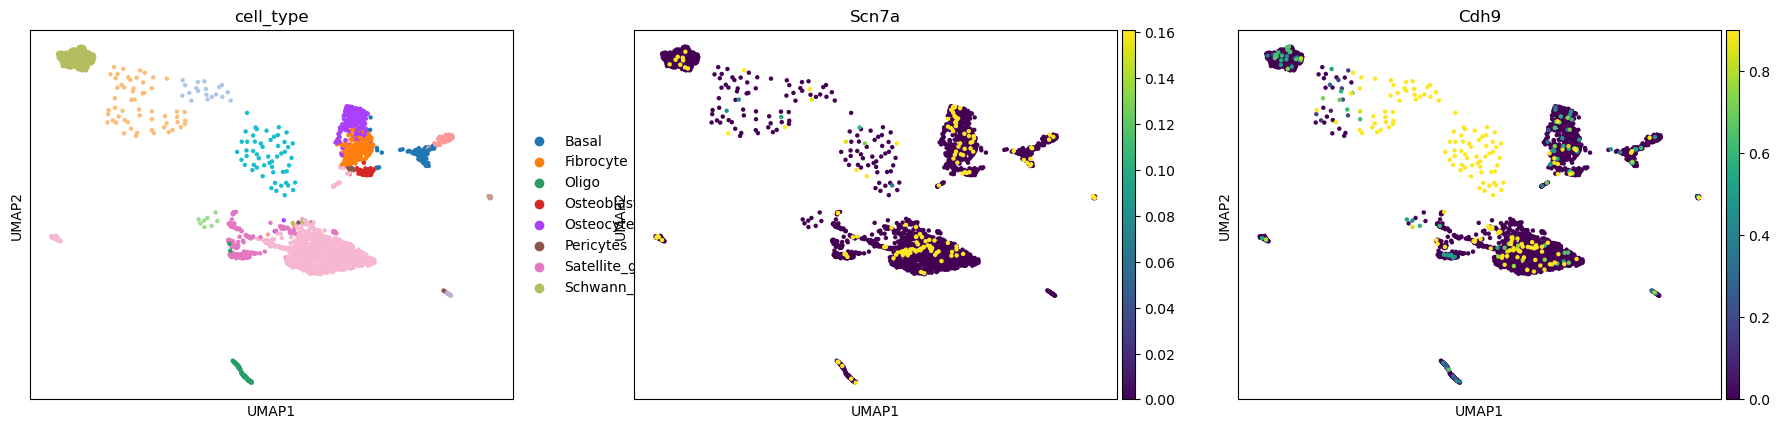

In [152]:
sc.pl.umap(adata,color=['cell_type','Scn7a','Cdh9'],layer='log1p',vmax='p95')

In [4]:
import numpy as np
import scanpy as sc

# Assuming 'log1p' layer contains log-transformed expression values
adata.obs['Scn7a_expression'] = np.exp(adata.layers['log1p'][:, adata.var_names == 'Scn7a'])

# Create a new AnnData object with only SCN7a-positive cells
filtered_adata = adata[adata.obs['Scn7a_expression'] > 3].copy()

# Remove the 'Scn7a_expression' column from the filtered_adata if you don't need it anymore
filtered_adata.obs.drop(columns=['Scn7a_expression'], inplace=True)

# Optionally, you can recompute the UMAP for the filtered_adata
sc.pp.neighbors(filtered_adata)
sc.tl.leiden(filtered_adata)

# Now, filtered_adata contains only SCN7a-positive cells


[Executed on 2023-10-26 11:02:17.636609]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packag

[Executed on 2023-10-26 11:03:23.423539]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


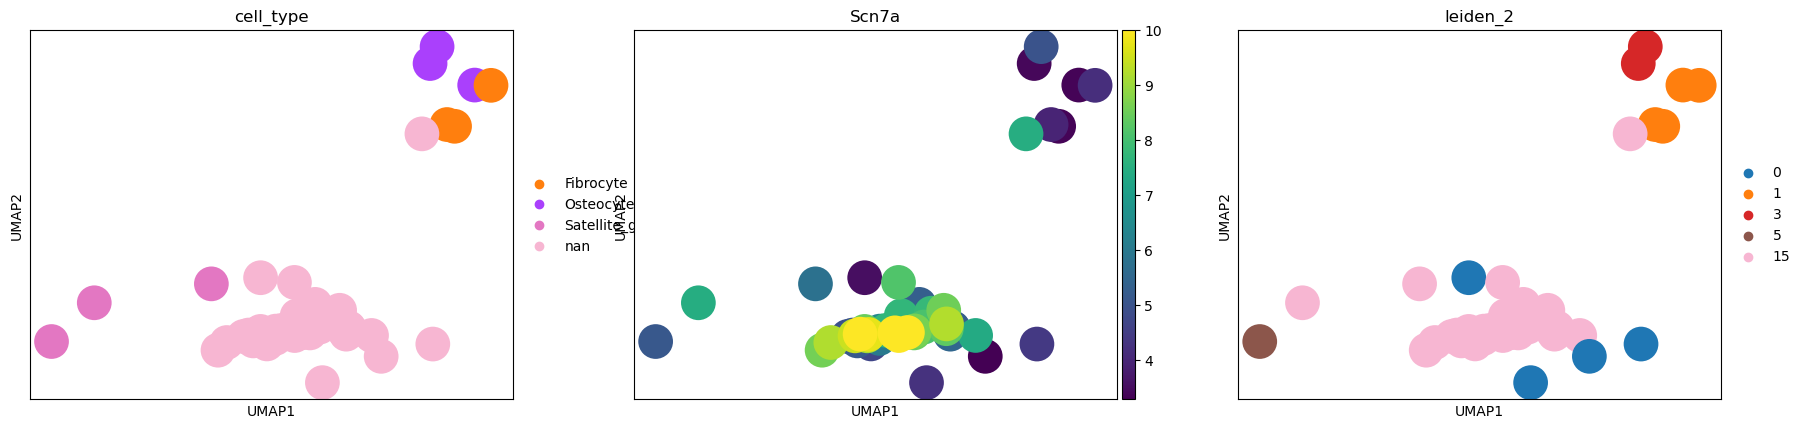

In [8]:
sc.pl.umap(filtered_adata,color=['cell_type','Scn7a','leiden_2'])

In [9]:
known_cluster

[Executed on 2023-10-26 11:04:17.286171]


AnnData object with n_obs × n_vars = 1772 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'leiden_new_colors', 'leiden_old_colors', 'leiden_sub_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_2nd', 'X_umap', 'X_umapOriginal', 'X_umap_2nd', 'X_umap_before'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

In [10]:
# Extract cell names from filtered_adata and known_cluster
filtered_cells = set(filtered_adata.obs.index)
known_cluster_cells = set(known_cluster.obs.index)

# Identify missing cells in known_cluster
missing_cells = filtered_cells - known_cluster_cells

# Append missing cells to known_cluster (assuming known_cluster is an AnnData object)
if len(missing_cells) > 0:
    # You may want to subset filtered_adata to only include the missing cells
    missing_cells_data = filtered_adata[filtered_adata.obs.index.isin(missing_cells)]
    
    # Append the missing_cells_data to known_cluster
    known_cluster = known_cluster.concatenate(missing_cells_data)

# Now, known_cluster should contain all cells from filtered_adata


[Executed on 2023-10-26 11:05:55.150296]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


[Executed on 2023-10-26 11:08:14.190053]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


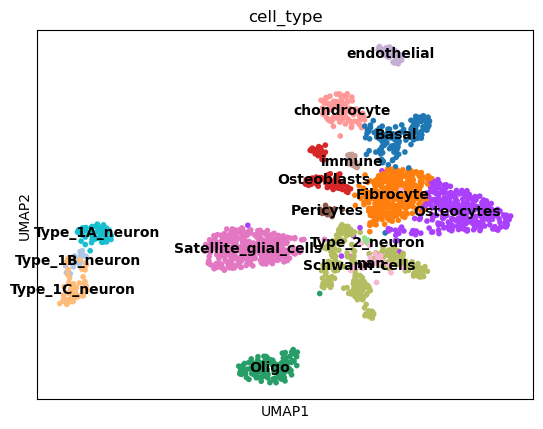

In [14]:
sc.pl.umap(known_cluster,color=['cell_type'],legend_loc='on data')

[Executed on 2023-10-26 11:09:13.064590]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


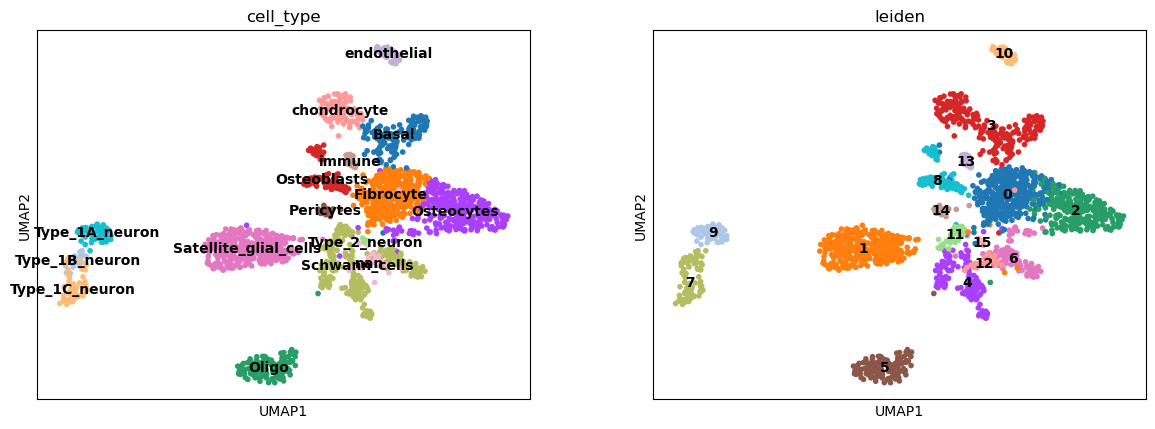

In [16]:
sc.pp.neighbors(known_cluster,n_neighbors=15)

sc.tl.leiden(known_cluster,resolution=0.5)

sc.pl.umap(known_cluster,color=['cell_type','leiden'],legend_loc='on data')

In [17]:
known_cluster.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_repca.h5ad")

[Executed on 2023-10-26 11:10:34.034534]


[Executed on 2023-10-26 11:15:37.588498]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


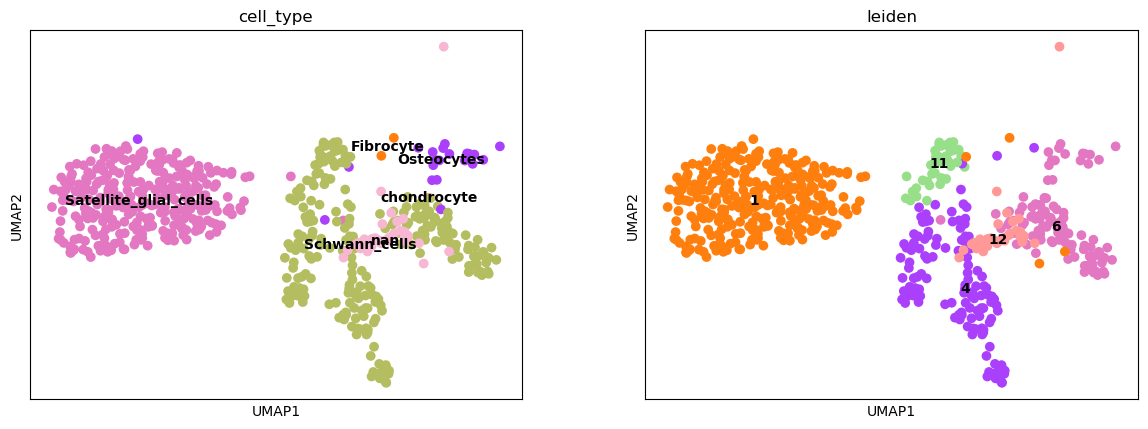

In [21]:
known_cluster_separate=known_cluster[known_cluster.obs['leiden'].isin(['1','11','4','12','6'])]

sc.pl.umap(known_cluster_separate,color=['cell_type','leiden'],legend_loc='on data')

[Executed on 2023-10-26 11:17:14.751403]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


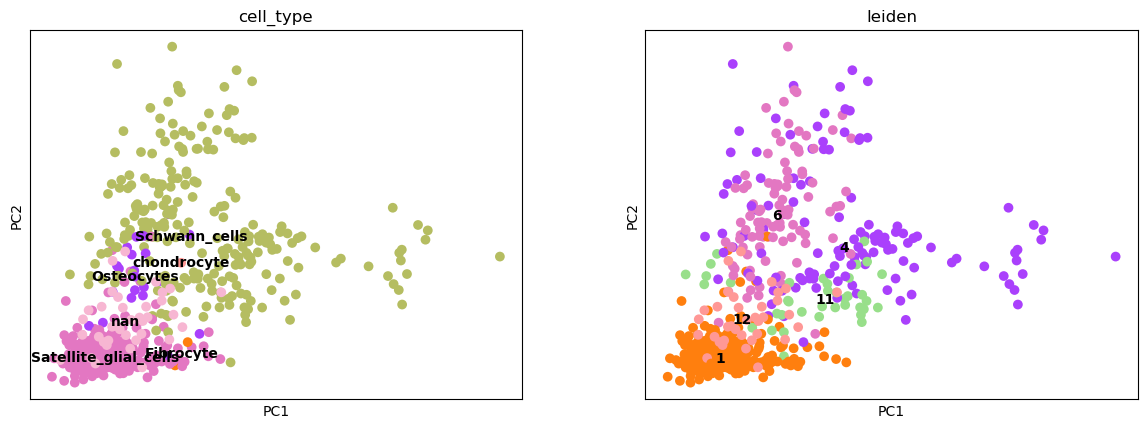

In [24]:
sc.pl.pca(known_cluster_separate,color=['cell_type','leiden'],legend_loc='on data')

In [23]:
known_cluster_separate.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_repca_separate_only_schwann.h5ad")

[Executed on 2023-10-26 11:16:58.724877]


[Executed on 2023-10-26 11:18:11.648693]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


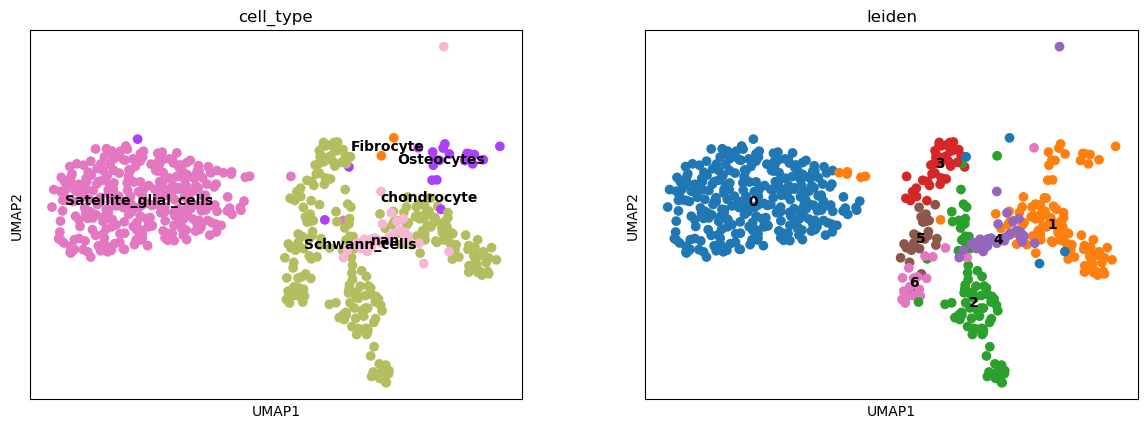

In [25]:
sc.pp.neighbors(known_cluster_separate,n_neighbors=15)
sc.tl.leiden(known_cluster_separate,resolution=0.5)
sc.pl.umap(known_cluster_separate,color=['cell_type','leiden'],legend_loc='on data')

[Executed on 2023-10-26 11:19:38.979535]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


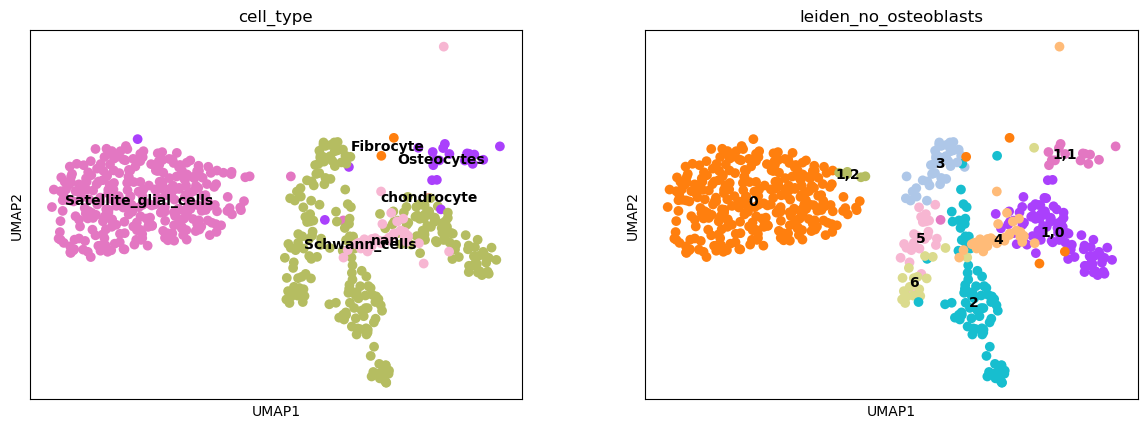

In [27]:
sc.tl.leiden(known_cluster_separate, restrict_to=('leiden', ['1']), key_added='leiden_no_osteoblasts',resolution=0.3)


sc.pl.umap(known_cluster_separate,color=['cell_type','leiden_no_osteoblasts'],legend_loc='on data')

In [32]:
filtered_adata.obs['leiden_no_osteoblasts'].value_counts()

[Executed on 2023-10-26 11:22:02.946542]


leiden_no_osteoblasts
0      304
1,0     87
2       82
3       38
4       35
5       23
6       20
1,1     15
1,2      5
Name: count, dtype: int64

[Executed on 2023-10-26 11:22:57.096799]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


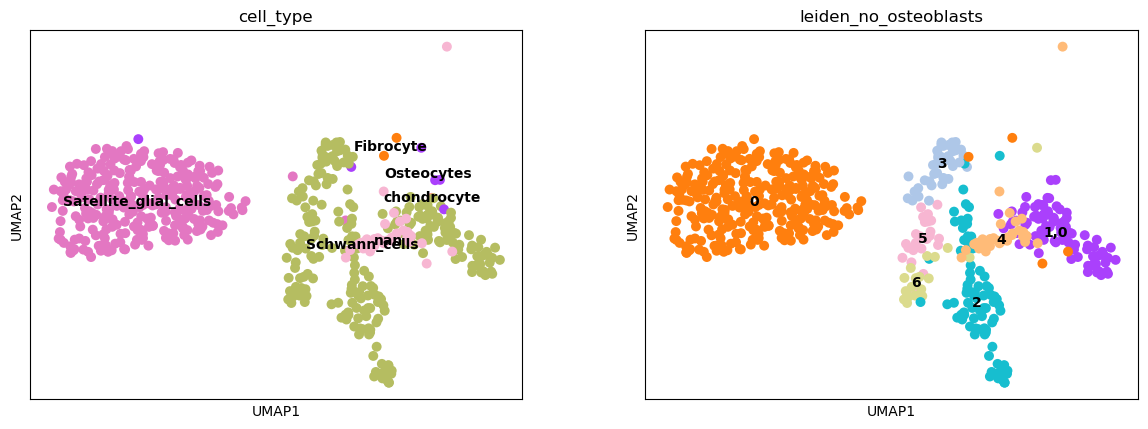

In [33]:
# 1. Filter out subcluster '1.1'
filtered_adata = known_cluster_separate[~known_cluster_separate.obs['leiden_no_osteoblasts'].isin(['1,1','1,2'])]

# 2. Update the UMAP visualization
sc.pl.umap(filtered_adata, color=['cell_type', 'leiden_no_osteoblasts'], legend_loc='on data')


[Executed on 2023-10-26 11:23:35.503461]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


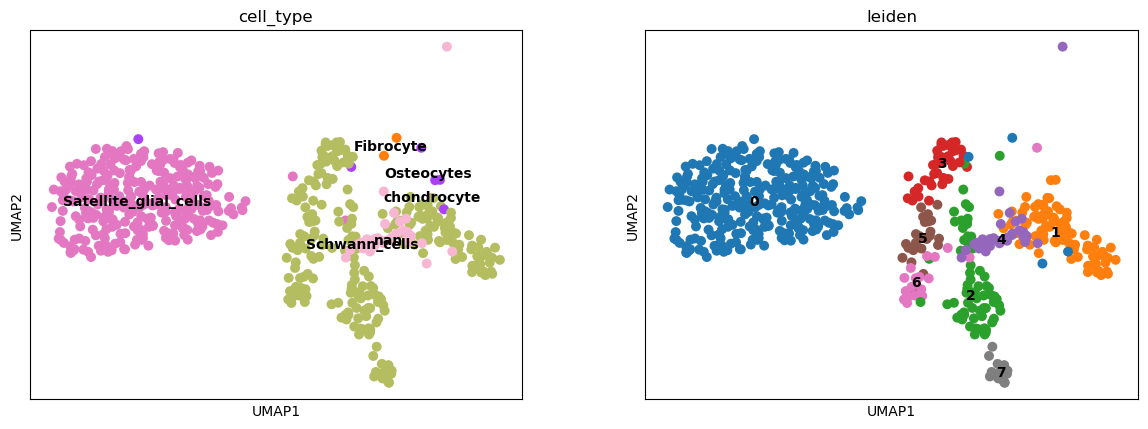

In [34]:
sc.tl.leiden(filtered_adata, resolution=0.5)

sc.pl.umap(filtered_adata, color=['cell_type', 'leiden'], legend_loc='on data')

[Executed on 2023-10-26 11:24:38.776894]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


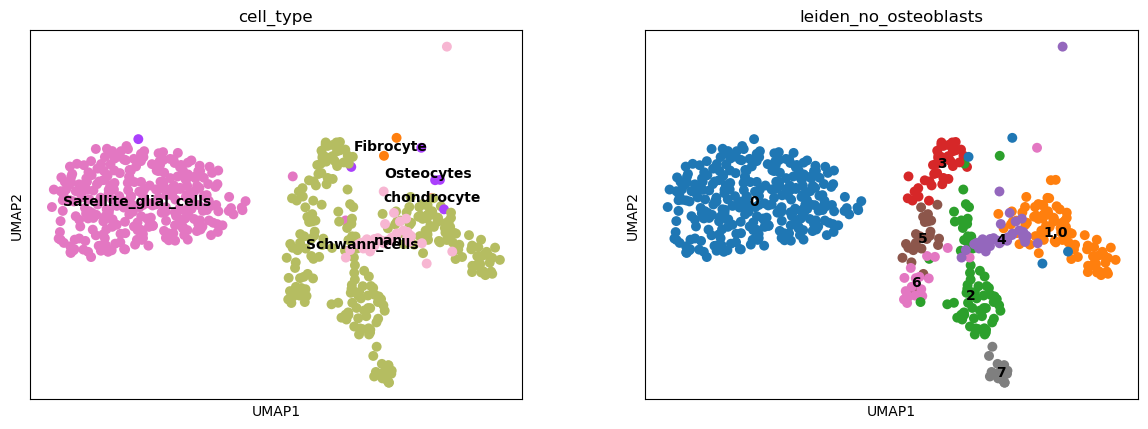

In [37]:
sc.pl.umap(filtered_adata, color=['cell_type', 'leiden_no_osteoblasts'], legend_loc='on data')

[Executed on 2023-10-26 11:35:10.302392]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


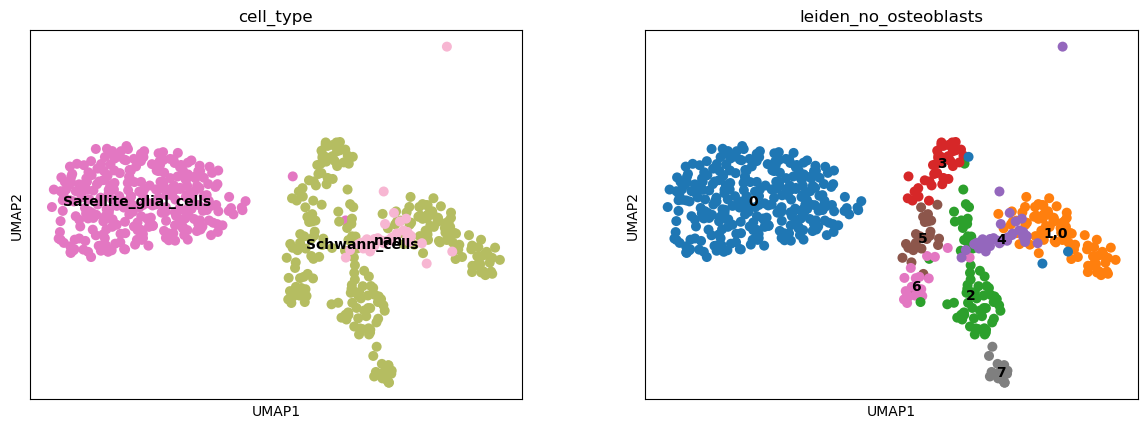

In [47]:
# Define the cell types to remove
cell_types_to_remove = ['Fibrocyte', 'Osteocytes', 'chondrocyte']

# Step 1: Identify cells with specified cell types
filtered_cells_to_remove = filtered_adata.obs.index[filtered_adata.obs['cell_type'].isin(cell_types_to_remove)]
known_cluster_cells_to_remove = known_cluster.obs.index[known_cluster.obs['cell_type'].isin(cell_types_to_remove)]

# Step 2: Create new filtered datasets excluding these cell types
filtered_adata_excluded = filtered_adata[~filtered_adata.obs.index.isin(filtered_cells_to_remove)]
known_cluster_excluded = known_cluster[~known_cluster.obs.index.isin(known_cluster_cells_to_remove)]

# Step 3: Update the UMAP visualization for the filtered dataset
sc.pl.umap(filtered_adata_excluded, color=['cell_type', 'leiden_no_osteoblasts'], legend_loc='on data')


In [41]:
sc.tl.leiden(filtered_adata_excluded, resolution=0.3)

[Executed on 2023-10-26 11:29:31.164287]


[Executed on 2023-10-26 11:42:48.691443]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


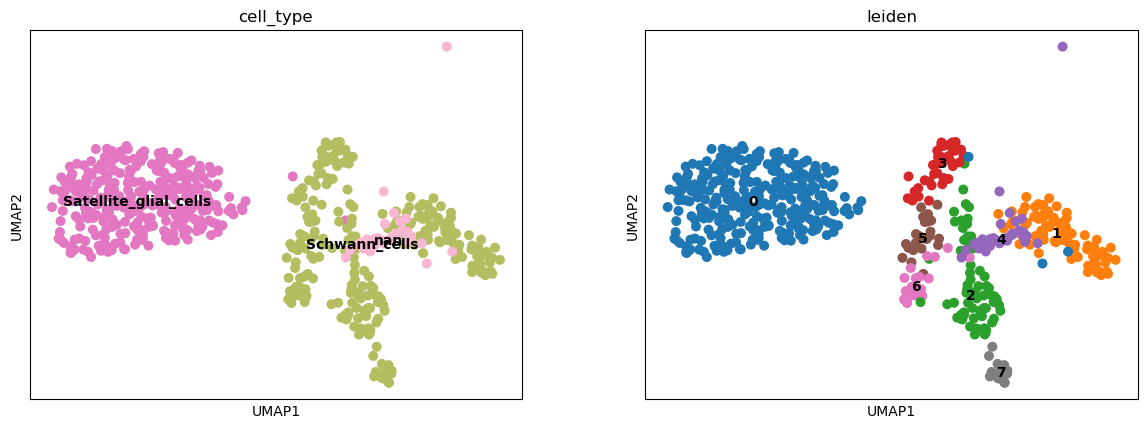

In [58]:
sc.pl.umap(filtered_adata_excluded,color=['cell_type','leiden'],legend_loc='on data')

[Executed on 2023-10-26 11:35:19.509294]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


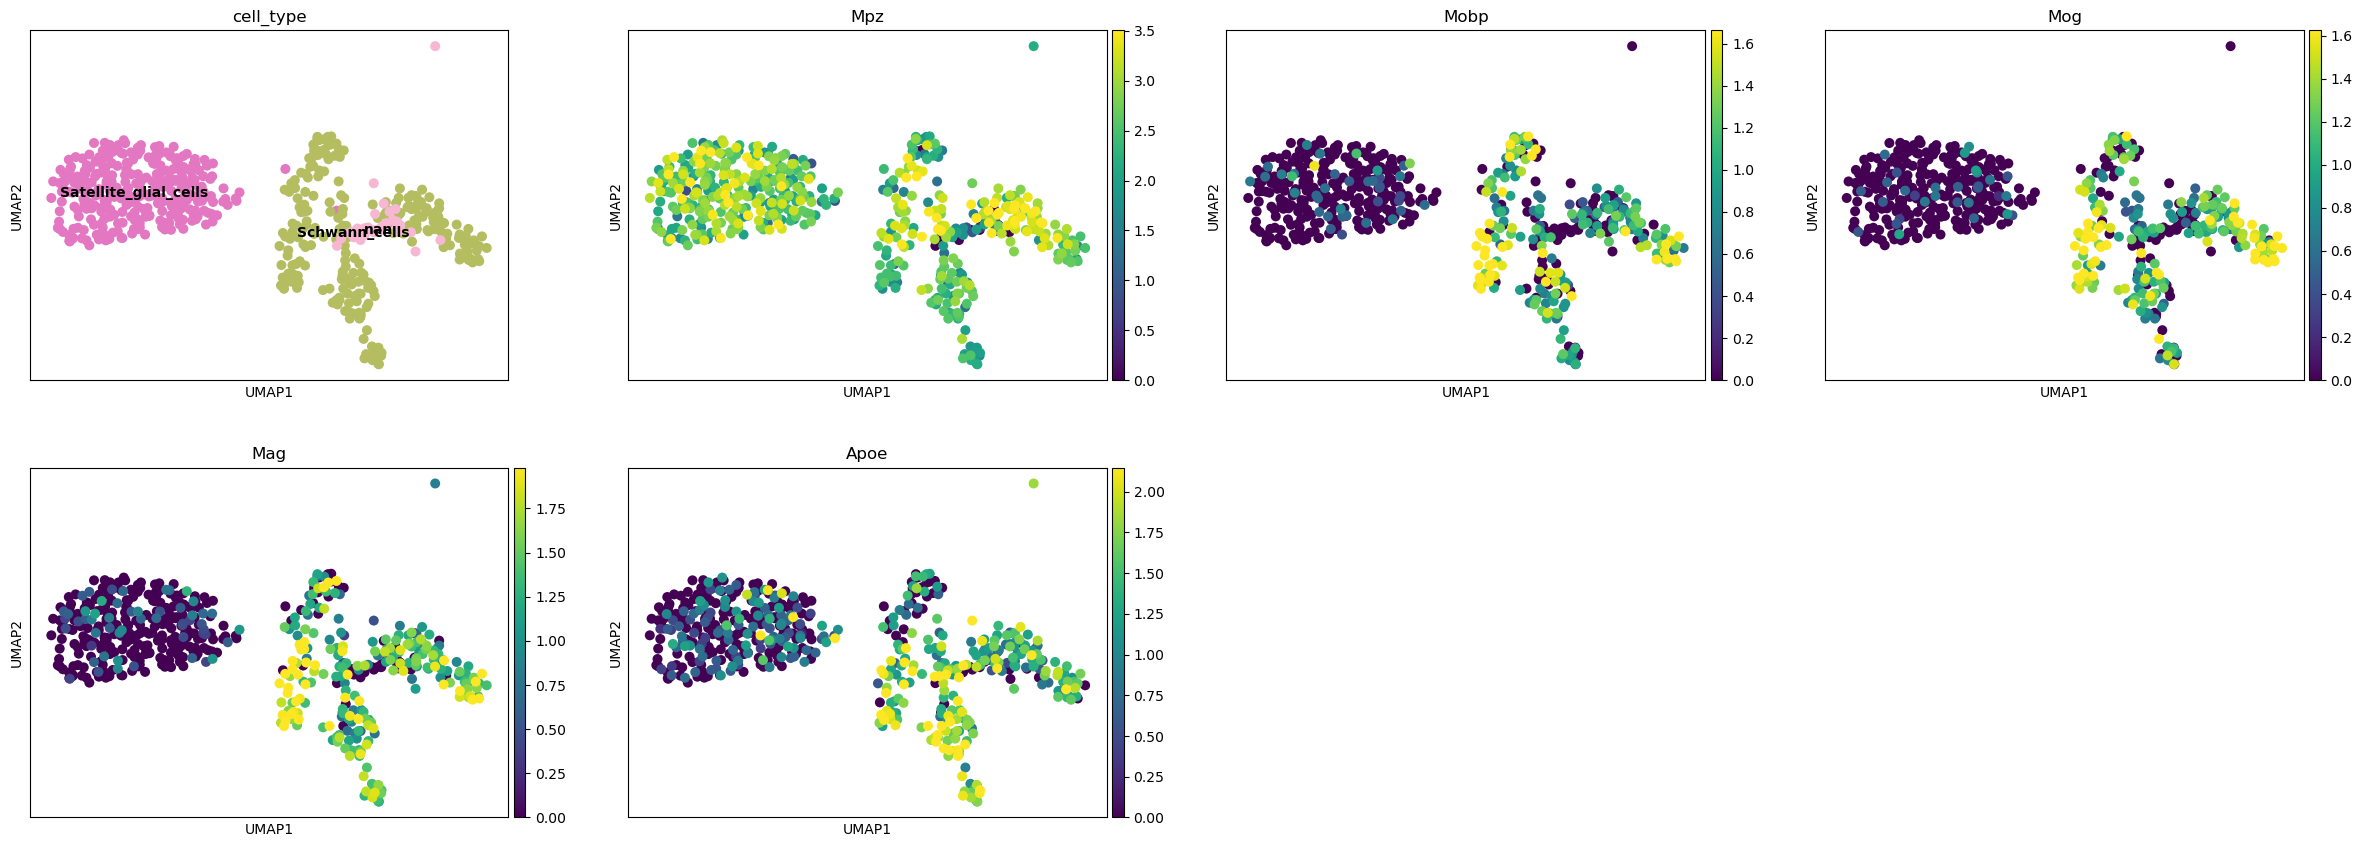

In [48]:
sc.pl.umap(filtered_adata_excluded,color=['cell_type','Mpz','Mobp','Mog','Mag','Apoe'],legend_loc='on data',layer='log1p',vmax='p95')

[Executed on 2023-10-26 11:45:51.159323]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


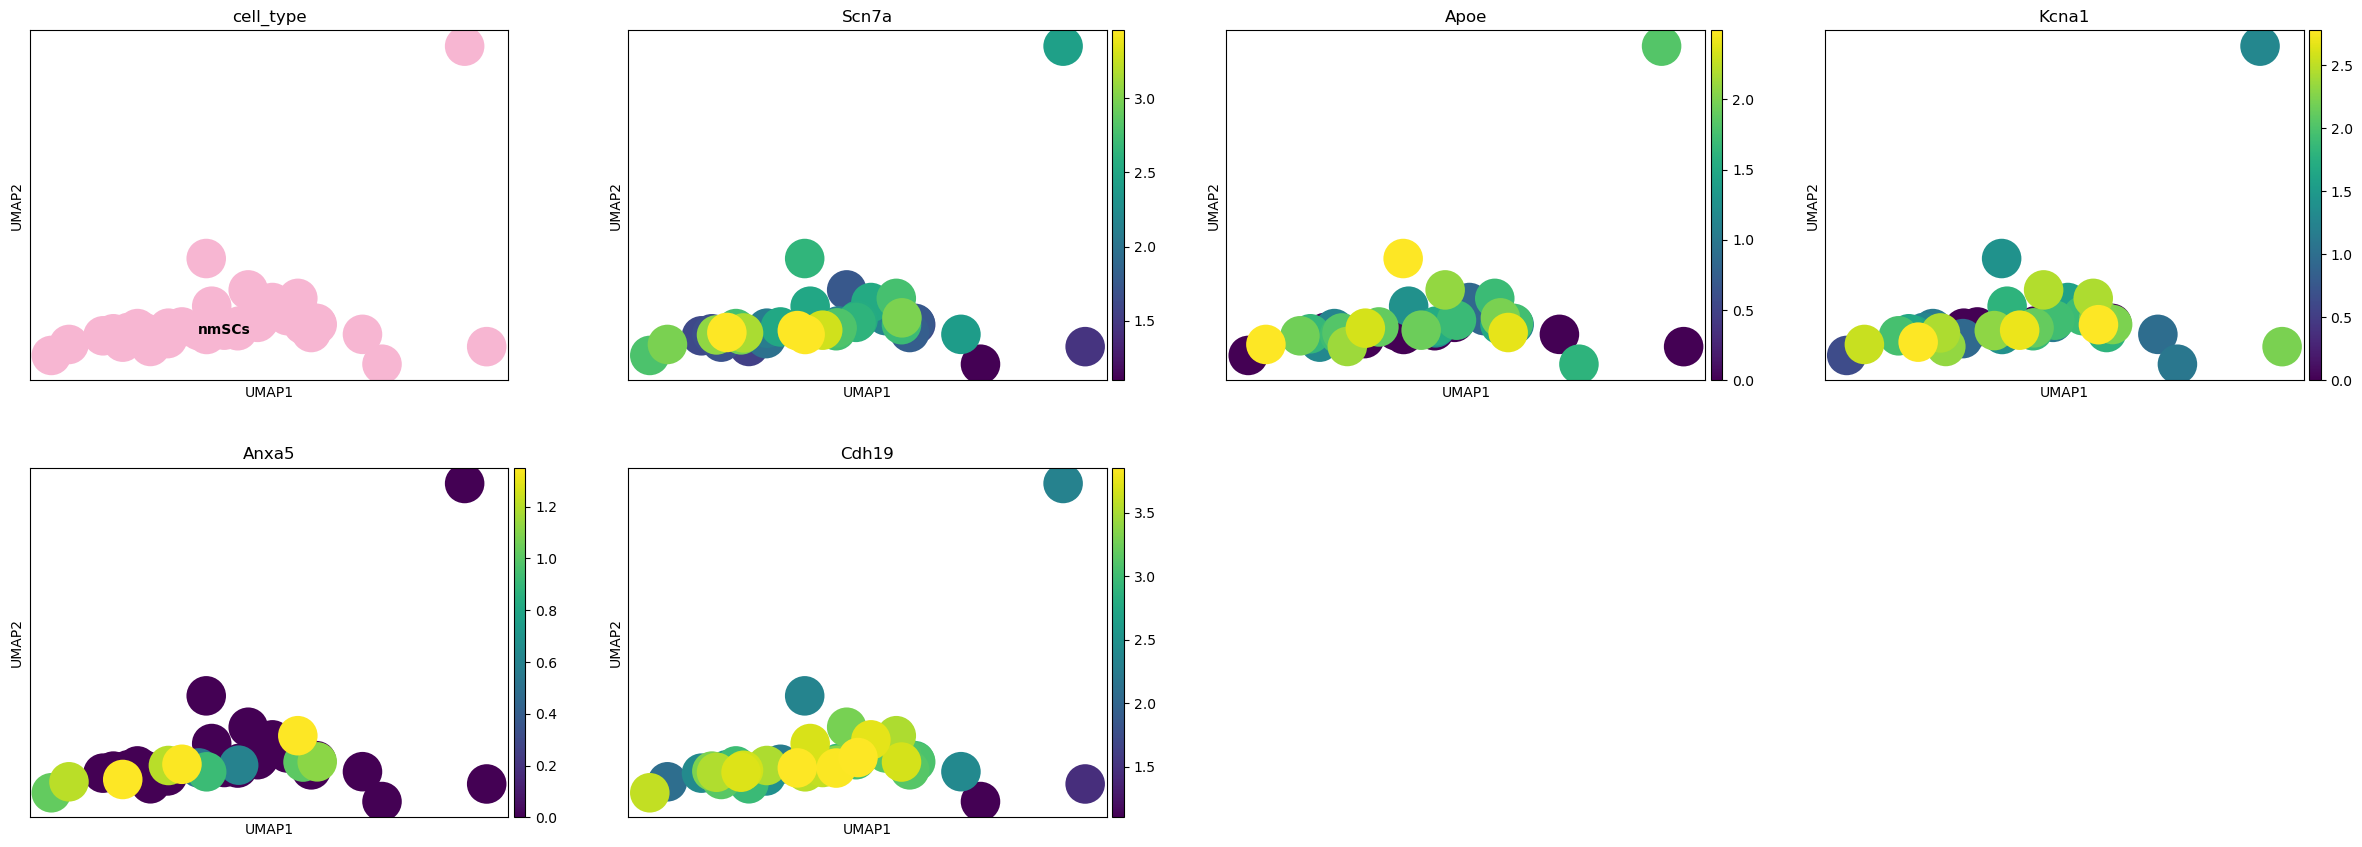

In [62]:
nmSCS=filtered_adata_excluded[filtered_adata_excluded.obs['cell_type'].isin(['nmSCs'])]

sc.pl.umap(nmSCS,color=['cell_type','Scn7a','Apoe','Kcna1','Anxa5','Cdh19'],legend_loc='on data',layer='log1p',vmax='p95')

In [59]:
#change nan to nmSCs
filtered_adata_excluded.obs['cell_type'].replace({'nan':'nmSCs'},inplace=True)

[Executed on 2023-10-26 11:45:24.094983]


[Executed on 2023-10-26 11:41:02.411485]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


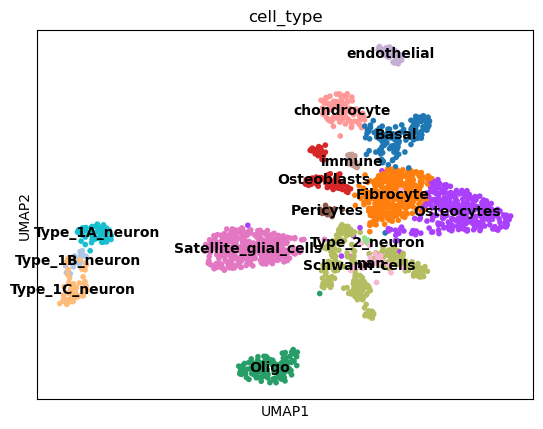

In [56]:
sc.pl.umap(known_cluster,color='cell_type',legend_loc='on data')

[Executed on 2023-10-26 11:41:44.583274]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


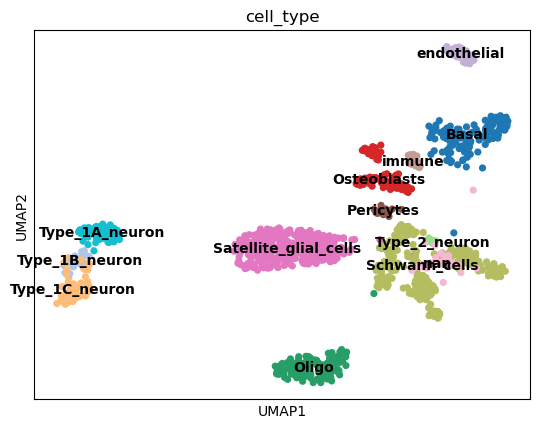

In [57]:
sc.pl.umap(known_cluster_excluded,color='cell_type',legend_loc='on data')

[Executed on 2023-10-26 11:46:28.703603]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


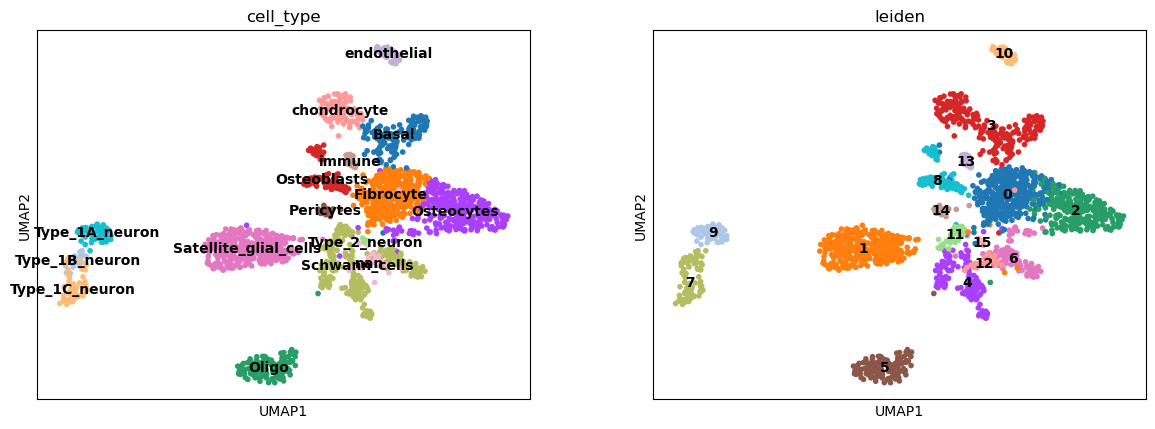

In [64]:
# 1. Identify the cells from filtered_adata_excluded that need to be added back
cells_to_add_back = filtered_adata_excluded.obs.index

# 2. Append the identified cells back to known_cluster_separate
known_cluster_separate = known_cluster_separate.concatenate(filtered_adata[filtered_adata.obs.index.isin(cells_to_add_back)])

# 3. Update the UMAP visualization for known_cluster_separate
sc.pl.umap(known_cluster, color=['cell_type', 'leiden'], legend_loc='on data')


In [69]:
known_cluster.obs['cell_type'].value_counts()

[Executed on 2023-10-26 11:47:39.977533]


cell_type
Fibrocyte                310
Satellite_glial_cells    306
Osteocytes               289
Schwann_cells            244
Basal                    124
Oligo                    124
chondrocyte               89
Osteoblasts               72
Type_1C_neuron            56
Type_1A_neuron            54
endothelial               39
nmSCs                     39
immune                    21
Type_1B_neuron            19
Pericytes                 17
Type_2_neuron              8
Name: count, dtype: int64

[Executed on 2023-10-26 11:50:46.959848]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


KeyError: 'nmSCs'

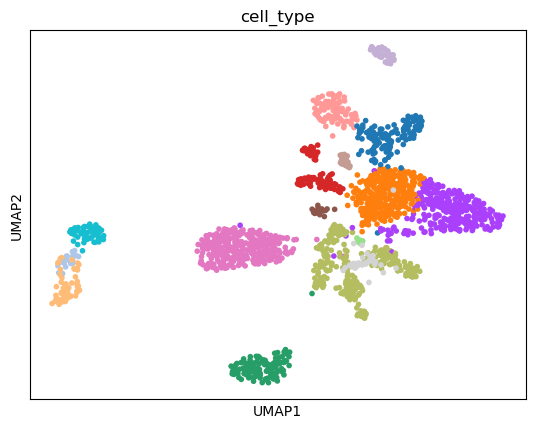

In [79]:
sc.pl.umap(known_cluster,color='cell_type',legend_loc='right margin')

[Executed on 2023-10-26 11:51:38.669306]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


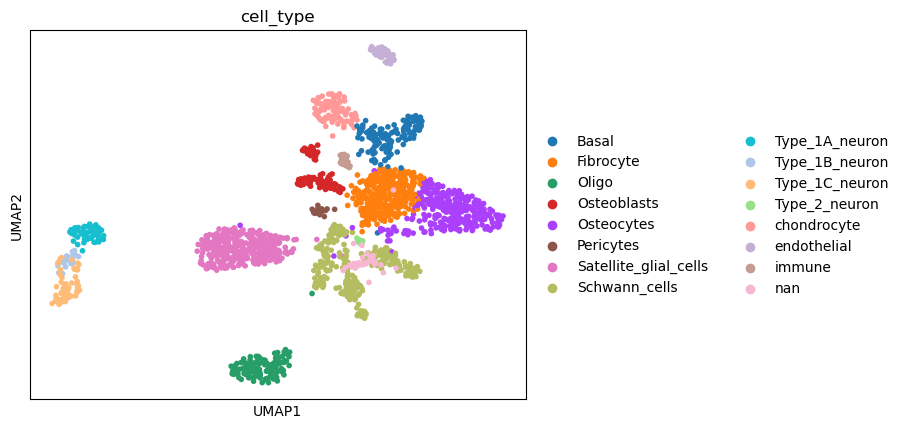

In [80]:
known_cluster=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_repca.h5ad")
sc.pl.umap(known_cluster,color='cell_type')

In [81]:
known_cluster.obs['cell_type'].value_counts()

[Executed on 2023-10-26 11:52:20.924685]


cell_type
Fibrocyte                310
Satellite_glial_cells    306
Osteocytes               289
Schwann_cells            244
Basal                    124
Oligo                    124
chondrocyte               89
Osteoblasts               72
Type_1C_neuron            56
Type_1A_neuron            54
endothelial               39
nan                       39
immune                    21
Type_1B_neuron            19
Pericytes                 17
Type_2_neuron              8
Name: count, dtype: int64

[Executed on 2023-10-26 11:52:41.358500]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


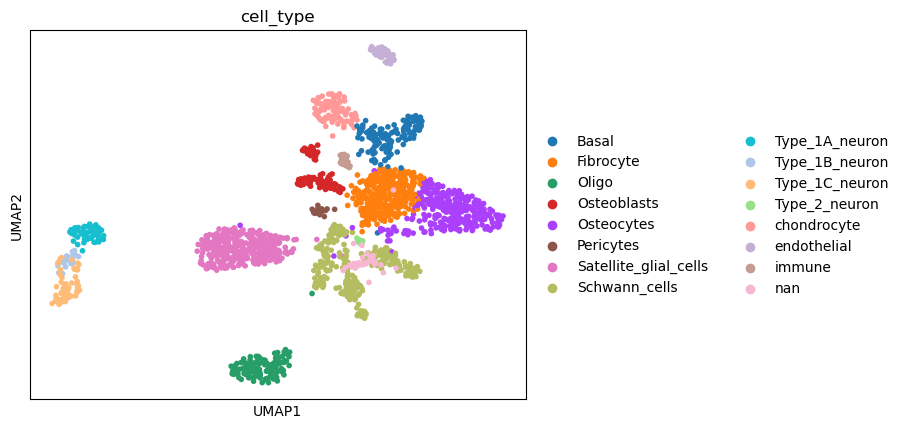

In [83]:
sc.pl.umap(known_cluster,color='cell_type',)

[Executed on 2023-10-26 11:53:28.827086]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


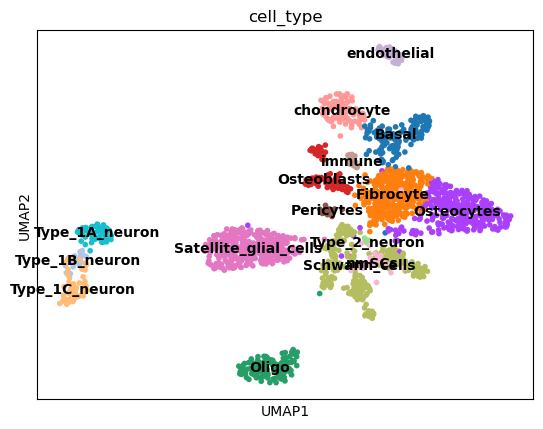

In [84]:
# Create the 'nmSCs' category if it doesn't exist
if 'nmSCs' not in known_cluster.obs['cell_type'].cat.categories:
    known_cluster.obs['cell_type'] = known_cluster.obs['cell_type'].cat.add_categories('nmSCs')

# Update the 'nan' category to 'nmSCs'
known_cluster.obs['cell_type'] = known_cluster.obs['cell_type'].str.replace('nan', 'nmSCs')


sc.pl.umap(known_cluster,color='cell_type',legend_loc='on data')

In [85]:
known_cluster.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_repca.h5ad")

[Executed on 2023-10-26 11:53:41.612755]


[Executed on 2023-10-26 11:54:21.788583]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


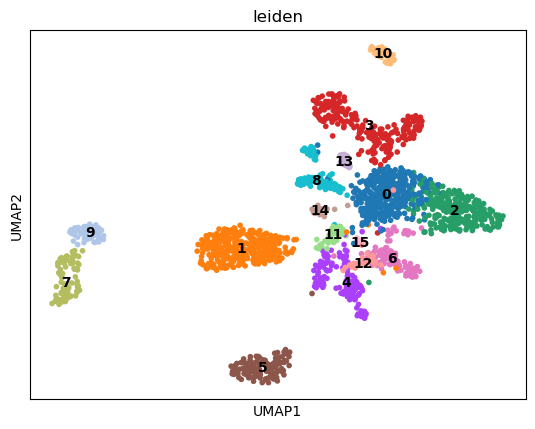

In [87]:
sc.pl.umap(known_cluster,color='leiden',legend_loc='on data')

In [ ]:
sc.tl.leiden(known_cluster,)

In [94]:
known_cluster_modified=known_cluster.copy()



[Executed on 2023-10-26 12:00:49.895260]


In [179]:

known_cluster_modified.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_repca_with_modified.h5ad")

[Executed on 2023-10-26 13:45:50.234550]


In [4]:
known_cluster_modified=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_repca_with_modified.h5ad")

[Executed on 2023-10-26 14:24:04.161062]


[Executed on 2023-10-26 11:59:20.060335]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


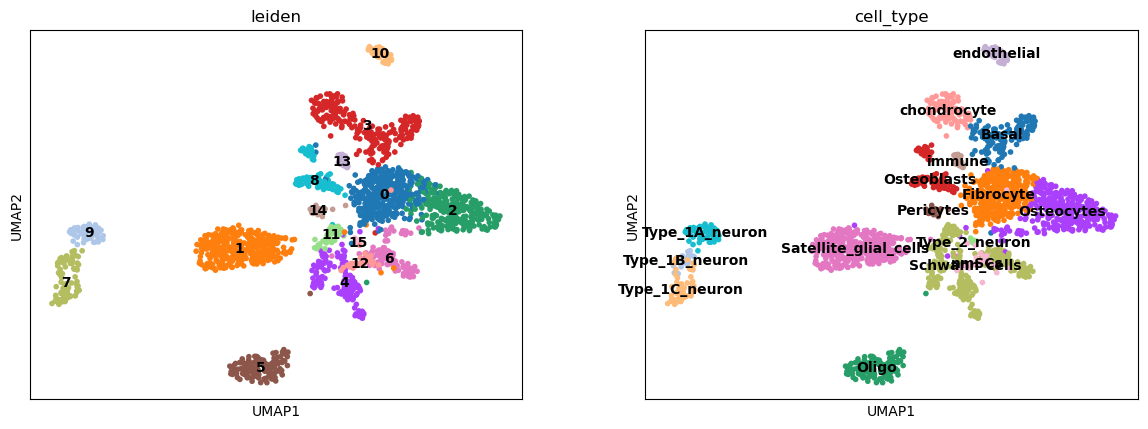

In [91]:
sc.pl.umap(known_cluster_modified,color=['leiden','cell_type'],legend_loc='on data')

[Executed on 2023-10-26 12:00:04.044002]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


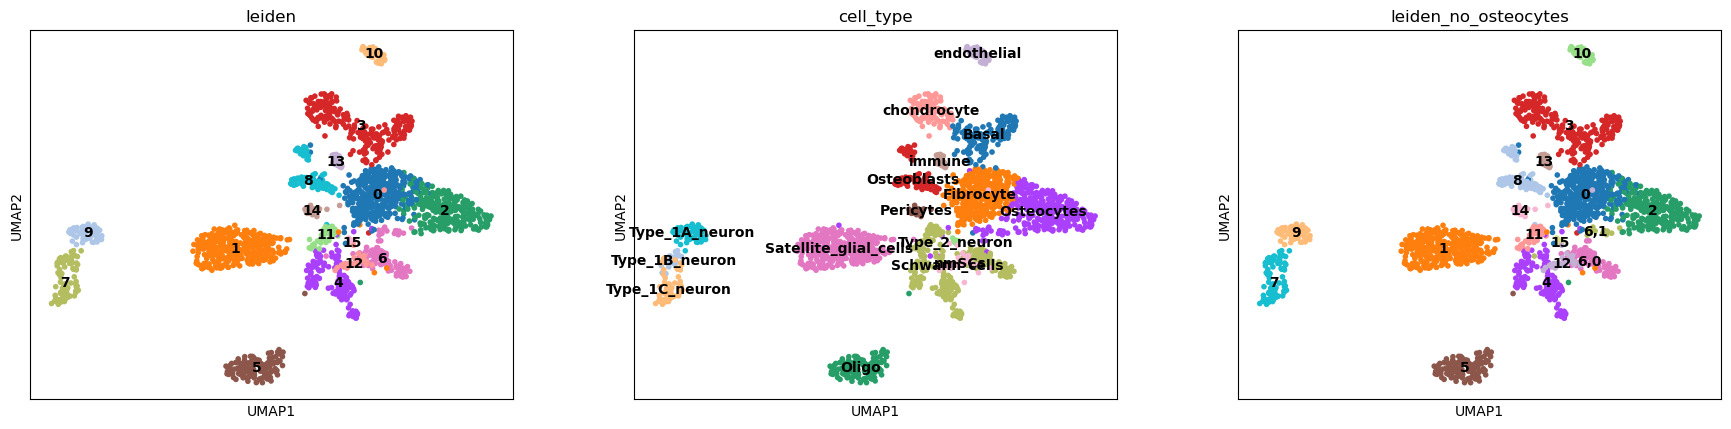

In [92]:
sc.tl.leiden(known_cluster_modified, restrict_to=('leiden', ['6']), key_added='leiden_no_osteocytes',resolution=0.3)

sc.pl.umap(known_cluster_modified,color=['leiden','cell_type','leiden_no_osteocytes'],legend_loc='on data')


[Executed on 2023-10-26 12:01:14.954509]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


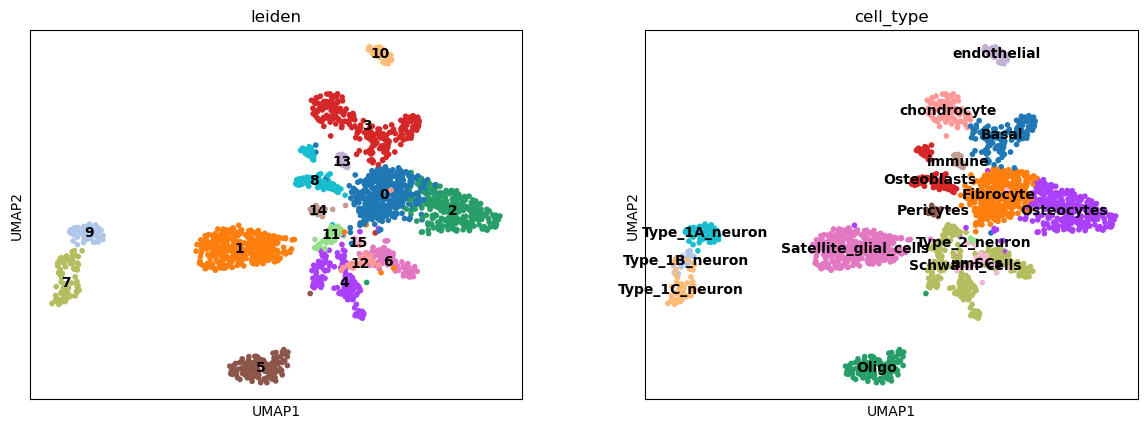

In [95]:
known_cluster_modified=known_cluster_modified[~known_cluster_modified.obs['leiden_no_osteocytes'].isin(['6,1'])]

sc.pl.umap(known_cluster_modified,color=['leiden','cell_type'],legend_loc='on data')


[Executed on 2023-10-26 12:03:04.673369]


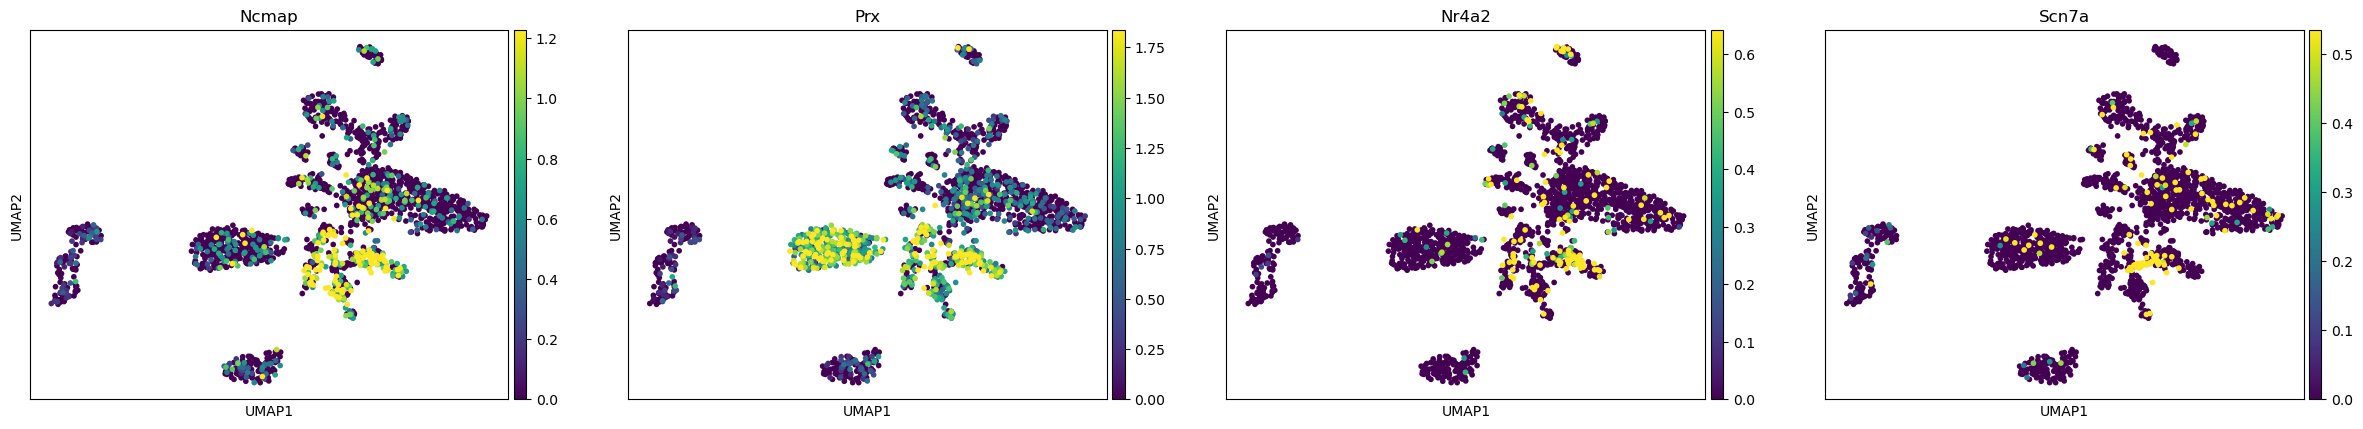

In [97]:
sc.pl.umap(known_cluster_modified,color=['Ncmap','Prx','Nr4a2','Scn7a'],legend_loc='on data',layer='log1p',vmax='p95')

In [101]:
known_cluster_modified

[Executed on 2023-10-26 12:05:39.403608]


AnnData object with n_obs × n_vars = 1796 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes'
    var: 'mean', 'std', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1'
    uns: 'cell_type_colors', 'leiden', 'leiden_2_colors', 'leiden_colors', 'neighbors', 'leiden_no_osteocytes_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

In [ ]:
del known_cluster_modified.uns['neighbors']

In [99]:
sc.tl.rank_genes_groups(known_cluster_modified,groupby='leiden',method='wilcoxon',n_genes=1000)

[Executed on 2023-10-26 12:04:43.811529]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid

In [100]:
sc.get.rank_genes_groups_df(known_cluster_modified,'1').head(10)

[Executed on 2023-10-26 12:05:23.624647]


names     scores  logfoldchanges          pvals      pvals_adj
0    Pde1c  27.065172             NaN  2.532108e-161  8.416980e-157
1  Slc6a15  26.975660             NaN  2.853099e-160  4.741993e-156
2    Npas3  26.030817             NaN  2.218672e-149  2.458362e-145
3    Mpzl1  25.695978             NaN  1.296345e-145  1.077295e-141
4    Ddhd1  25.556498             NaN  4.649523e-144  3.091096e-140
5    Lama1  24.962105             NaN  1.577830e-137  8.741443e-134
6    Slit3  24.929857             NaN  3.531782e-137  1.677142e-133
7    Lrrc7  24.638599             NaN  4.876274e-134  2.026153e-130
8      Dmd  24.590858             NaN  1.582209e-133  5.843802e-130
9   Kif26b  24.579828             NaN  2.076041e-133  6.900968e-130

In [102]:
gene_list_gp1=[ "Iah1", "Ptma", "Hmgb1", "Hnrnpc", "Trmt112", "Ube2i", 
    "Sf3b2", "Polr2e", "Arpc5", "Cdk2ap1", "Arpc1a", "Fam192a"]

gene_list_gp2 = [
    "Fam126a", "Gramd1b", "Lamc1", "Ctnnd1", "Spink5", "Adgra3", 
    "Dennd2a", "Abca1", "Yap1", "Rasa3", "Slc43a2", "Sort1", "Tmc7", 

]

gene_list_gp0= [
    "Aldoc", "Pon2", "Fbln5", "Ctsk", "Cat", "Npc2", "Bsg", "Cib1", 
    "S100a1", "Pmvk", "Mmd2", "Pebp1", "Wfdc1", "Rsph9", "Apoe", 

]

gene_list_gp6= [
    "Ywhag", "Ywhab", "Dctn1", "Prkar1b", "Rtn3", "Klc1", "Nefh", 
    "Kif5a", "Snap25", "Gabarapl1", "Eif5a2", "Tspyl4", "Bnip3", 
]


gene_list_gp3=["Agtpbp1", "Arfgef3", "Larp1", "Dync1h1", "Tbc1d9", "Ube2o", 
    "Arfgef2", "Dmxl2", "Ap3b2", "Dubr", "Ubash3b", "Cacnb4"]

gene_list_gp4=[ "Ring1", "Anapc5", "Ncaph2", "Zfp358", "Agpat2", "Tmbim1", 
    "Impdh2", "Nab2", "Cyth2", "Sat1", "Gps2", "BC004004"]

gene_list_gp5=[ "Ube2v2", "Sdcbp", "Atp1b1", "Pafah1b2", "Rtn3", "Trappc2",
    "Nptn", "Vps35", "Ghitm", "Ywhag", "Ncdn", "Tmem30a"]


gene_list={
    'gp0':gene_list_gp0,
    'gp1':gene_list_gp1,
    'gp2':gene_list_gp2,
    'gp3':gene_list_gp3,
    'gp4':gene_list_gp4,
    'gp5':gene_list_gp5,
    'gp6':gene_list_gp6,
}


for key in gene_list.keys():
    sc.tl.score_genes(known_cluster_modified, gene_list[key], score_name=key)

[Executed on 2023-10-26 12:07:16.492237]


[Executed on 2023-10-26 12:08:32.895111]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


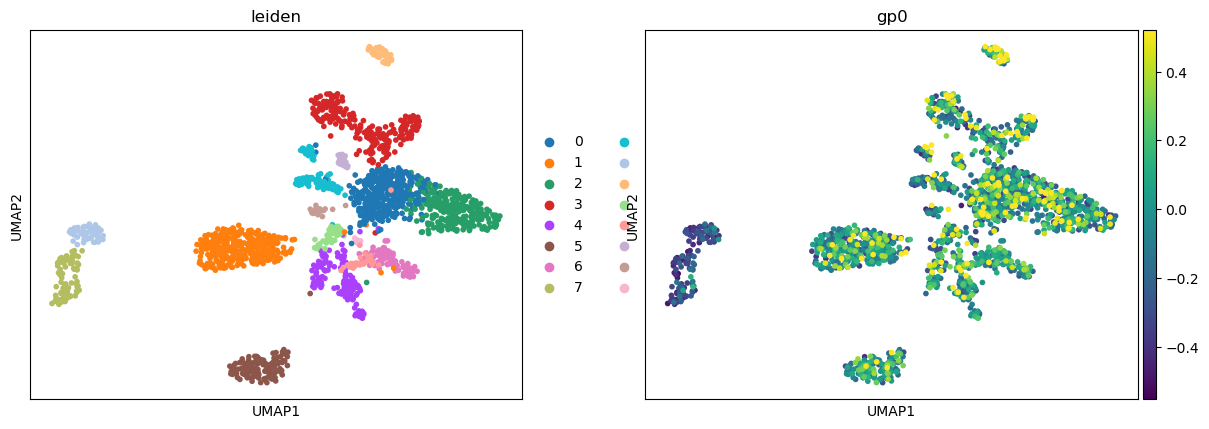

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


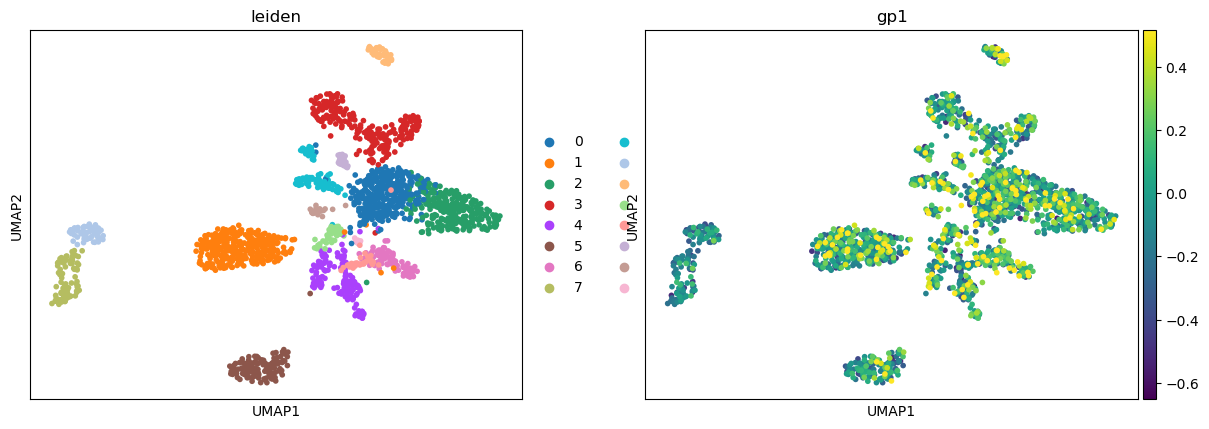

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


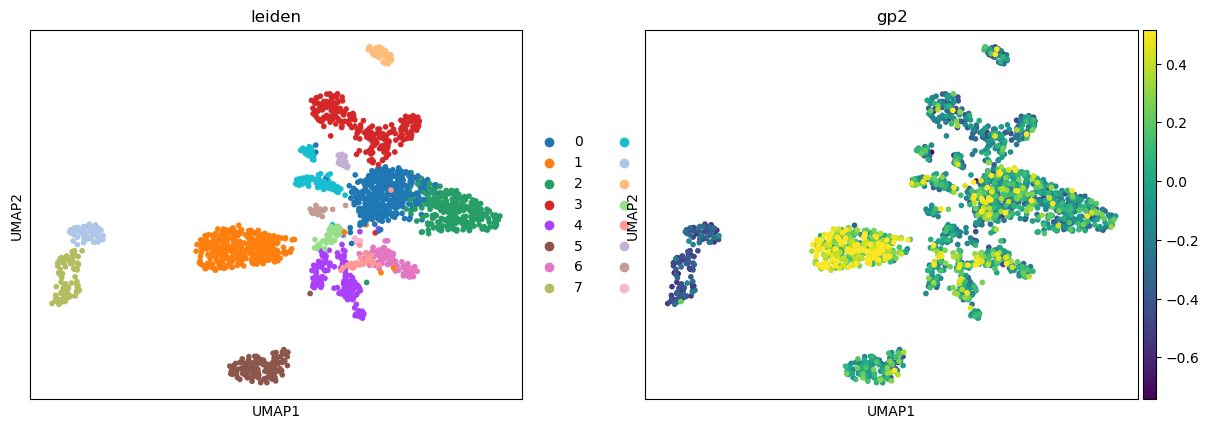

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


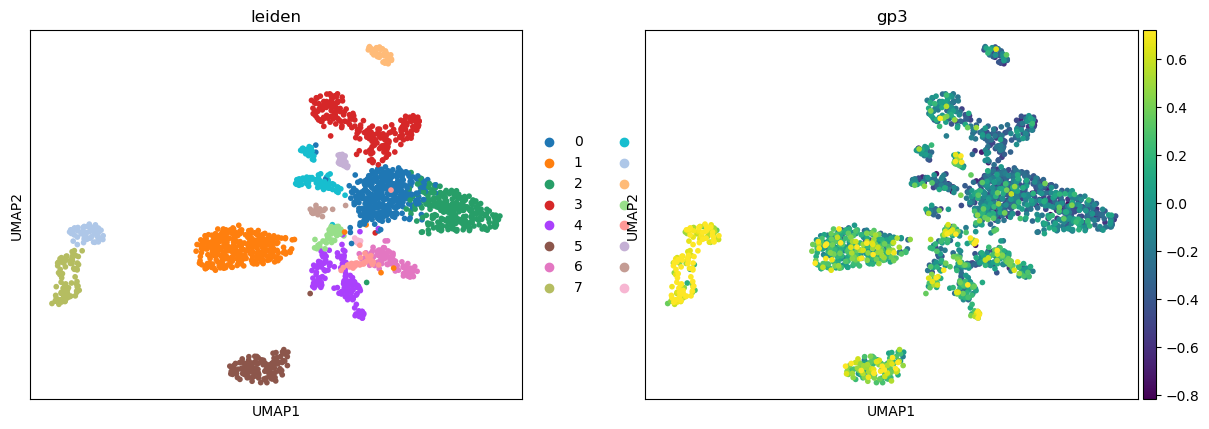

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


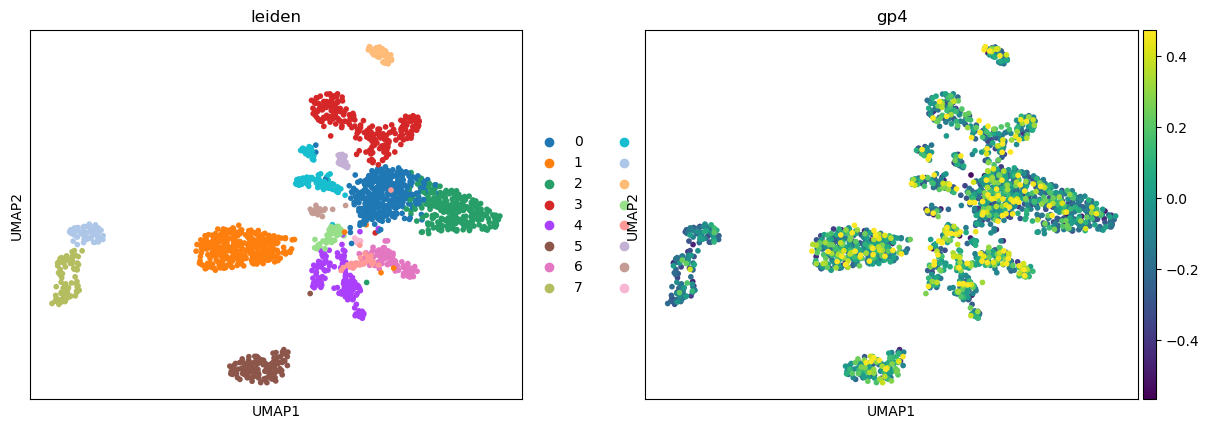

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


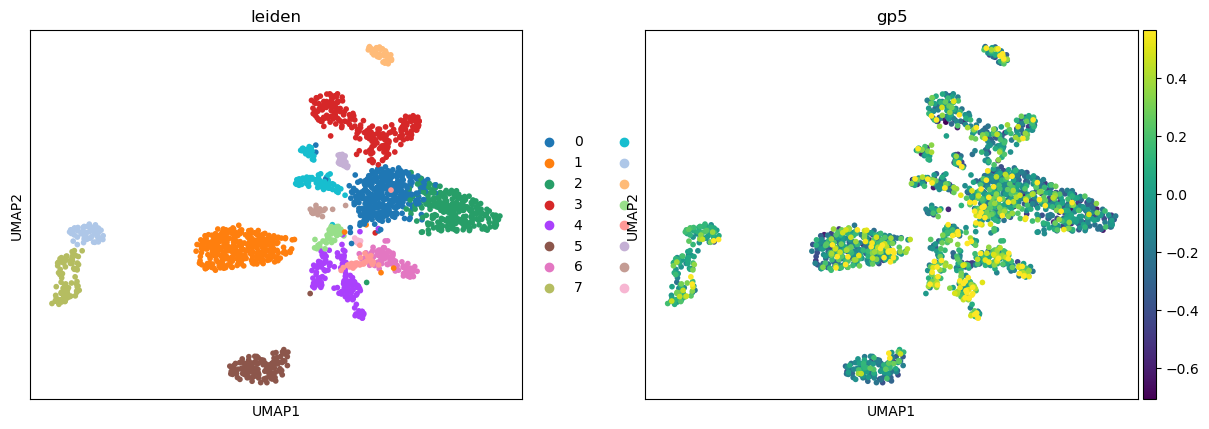

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


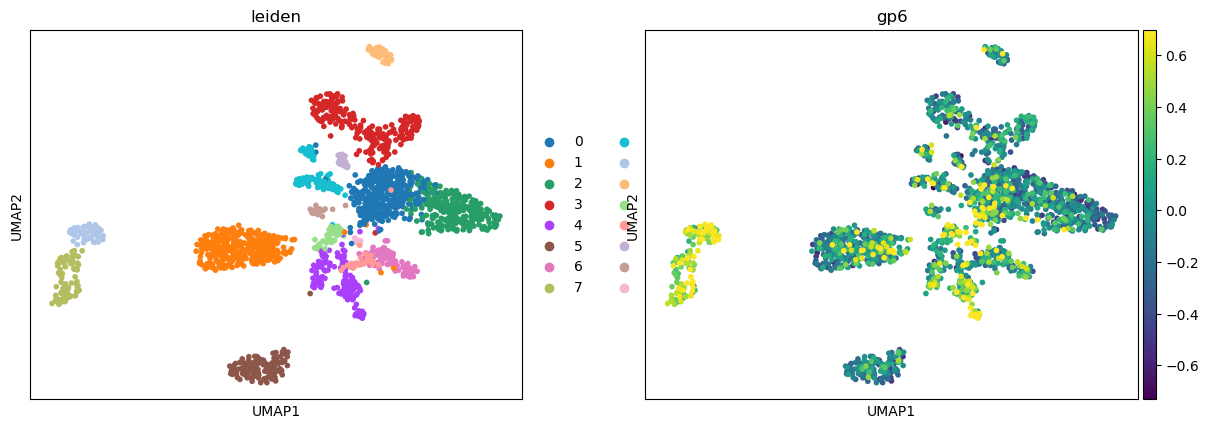

In [105]:
for i in gene_list.keys():
    sc.pl.umap(known_cluster_modified, color=['leiden',i],vmax='p95')

[Executed on 2023-10-26 12:09:35.400180]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


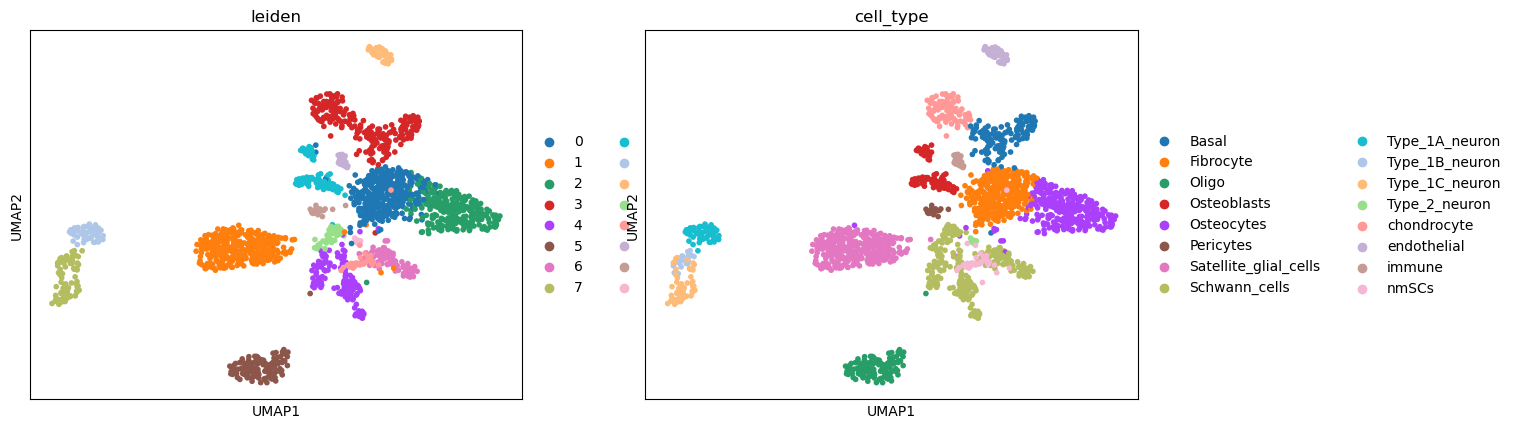

In [106]:
sc.pl.umap(known_cluster_modified,color=['leiden','cell_type'])

In [107]:
known_cluster_modified_2=known_cluster_modified.copy()

[Executed on 2023-10-26 12:12:54.821950]


[Executed on 2023-10-26 12:35:41.391085]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


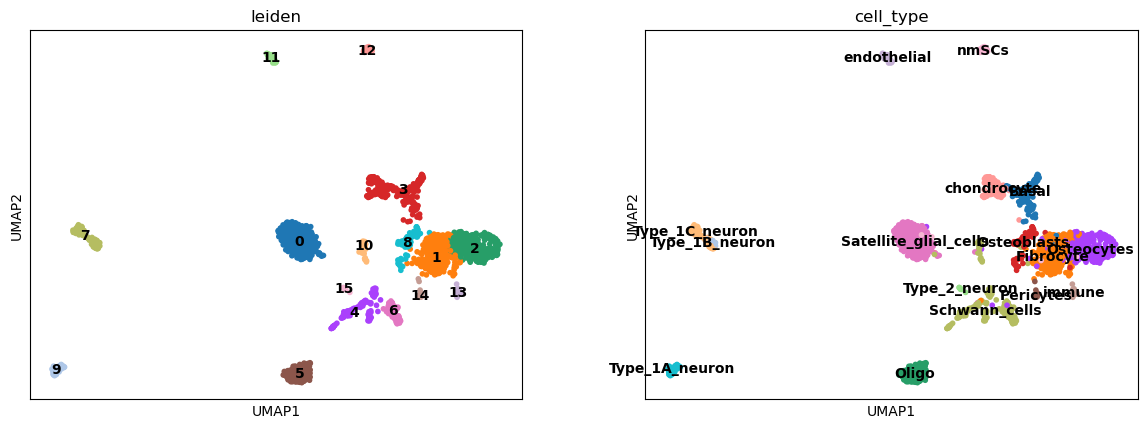

In [127]:
#sc.tl.leiden(known_cluster_modified_2,resolution=0.6)

sc.pl.umap(known_cluster_modified_2,color=['leiden','cell_type'],legend_loc='on data')

In [130]:
sc.tl.umap(known_cluster_modified_2,min_dist=0.6)

[Executed on 2023-10-26 12:37:32.432520]


[Executed on 2023-10-26 12:42:27.997654]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


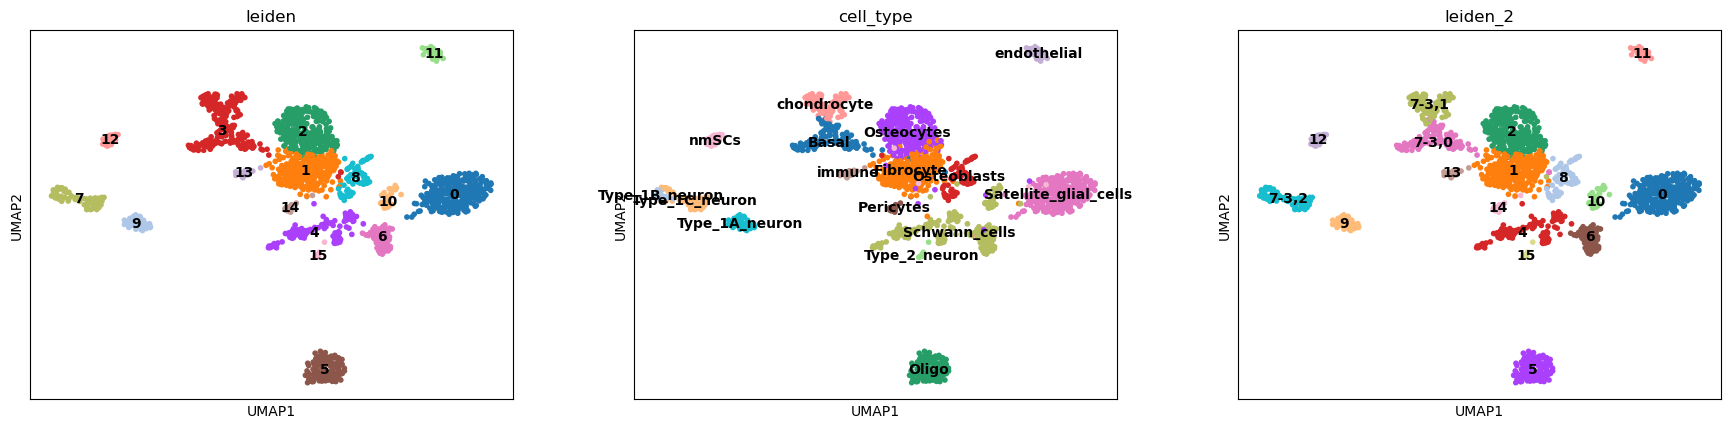

In [140]:
sc.tl.leiden(known_cluster_modified_2, restrict_to=('leiden', ['7', '3']), key_added='leiden_2', resolution=0.3)

sc.pl.umap(known_cluster_modified_2,color=['leiden','cell_type','leiden_2'],legend_loc='on data')

[Executed on 2023-10-26 12:42:38.932968]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


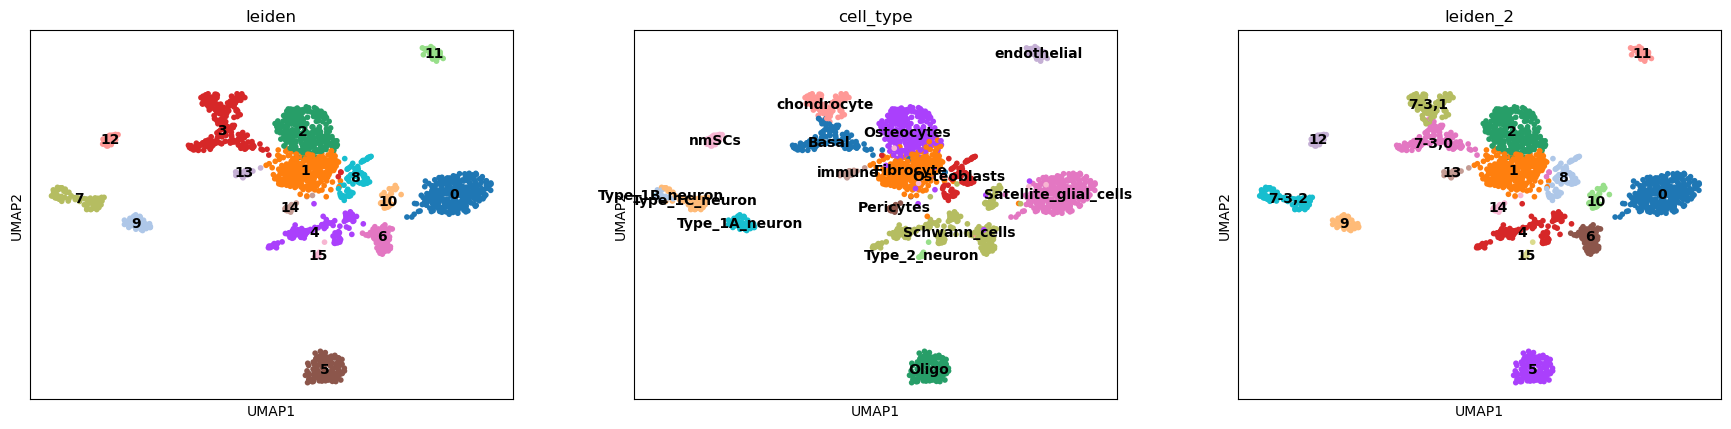

In [141]:
sc.tl.leiden(known_cluster_modified_2, restrict_to=('leiden', ['7','3']), key_added='leiden_2',resolution=0.2)

sc.pl.umap(known_cluster_modified_2,color=['leiden','cell_type','leiden_2'],legend_loc='on data')

In [132]:
known_cluster_modified_2

[Executed on 2023-10-26 12:38:43.445660]


AnnData object with n_obs × n_vars = 1796 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6'
    var: 'mean', 'std', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1'
    uns: 'cell_type_colors', 'leiden', 'leiden_2_colors', 'leiden_colors', 'neighbors', 'leiden_no_osteocytes_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-10-26 12:38:58.259984]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


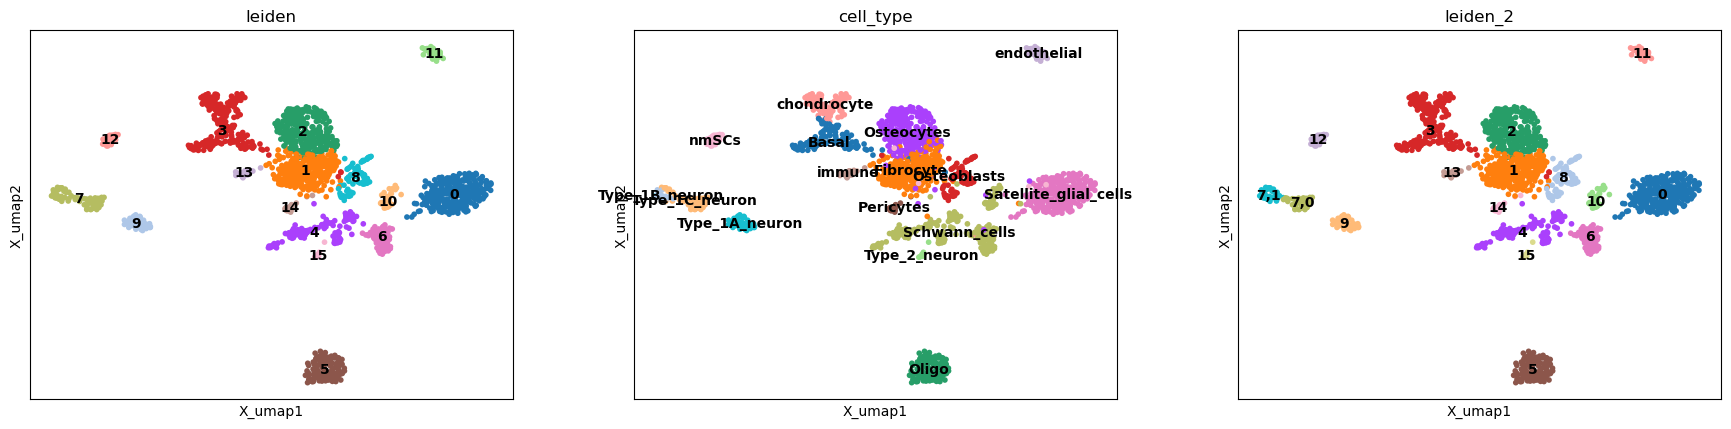

In [134]:
sc.pl.embedding(known_cluster_modified_2,basis='X_umap',color=['leiden','cell_type','leiden_2'],legend_loc='on data')

In [153]:
known_cluster_modified_2.obs['leiden_2'].value_counts()

[Executed on 2023-10-26 13:00:51.742138]


leiden_2
0        309
1        308
2        272
4        125
5        124
7-3,0    121
7-3,1     89
6         87
7-3,2     76
8         72
9         53
10        39
11        39
12        35
13        21
14        18
15         8
Name: count, dtype: int64

[Executed on 2023-10-26 12:52:26.495032]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


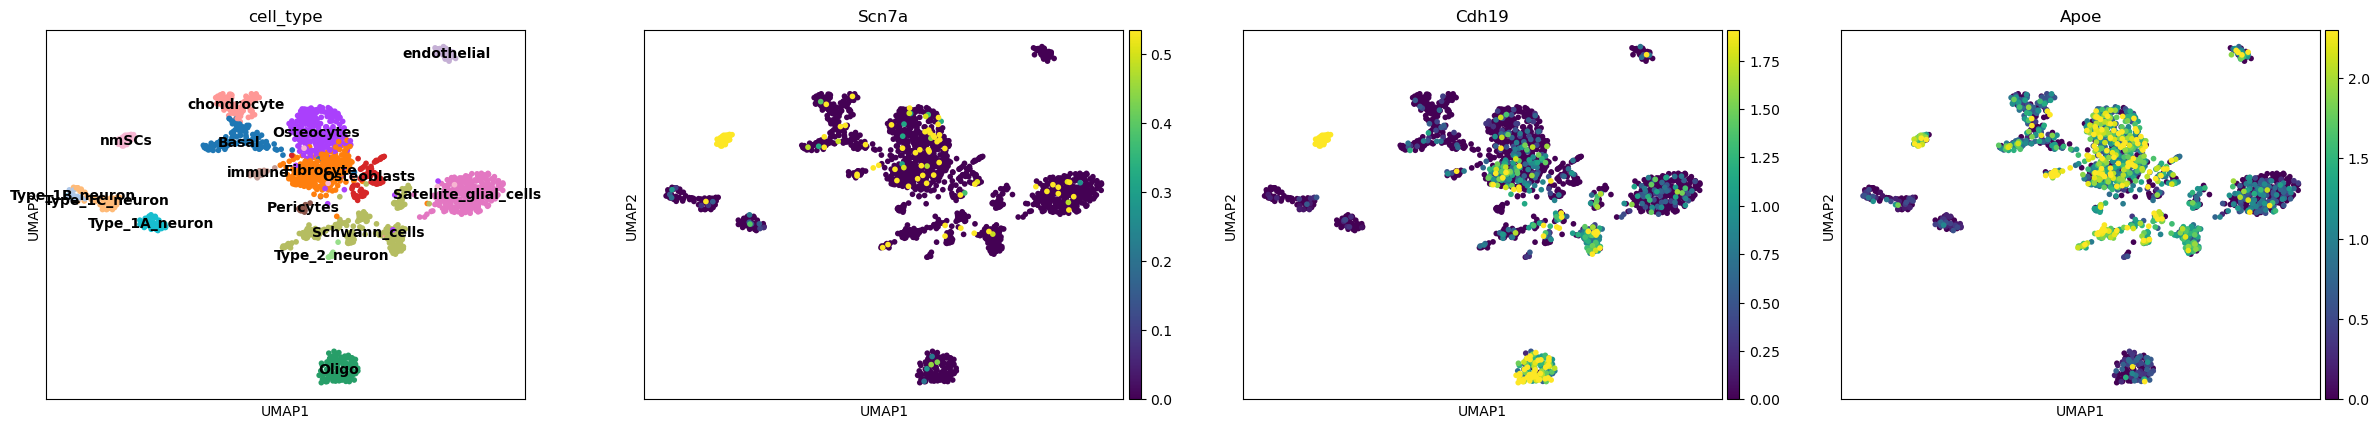

In [151]:
sc.pl.umap(known_cluster_modified_2,color=['cell_type','Scn7a','Cdh19','Apoe'],legend_loc='on data',layer='log1p',vmax='p95')

[Executed on 2023-10-26 13:10:40.800602]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


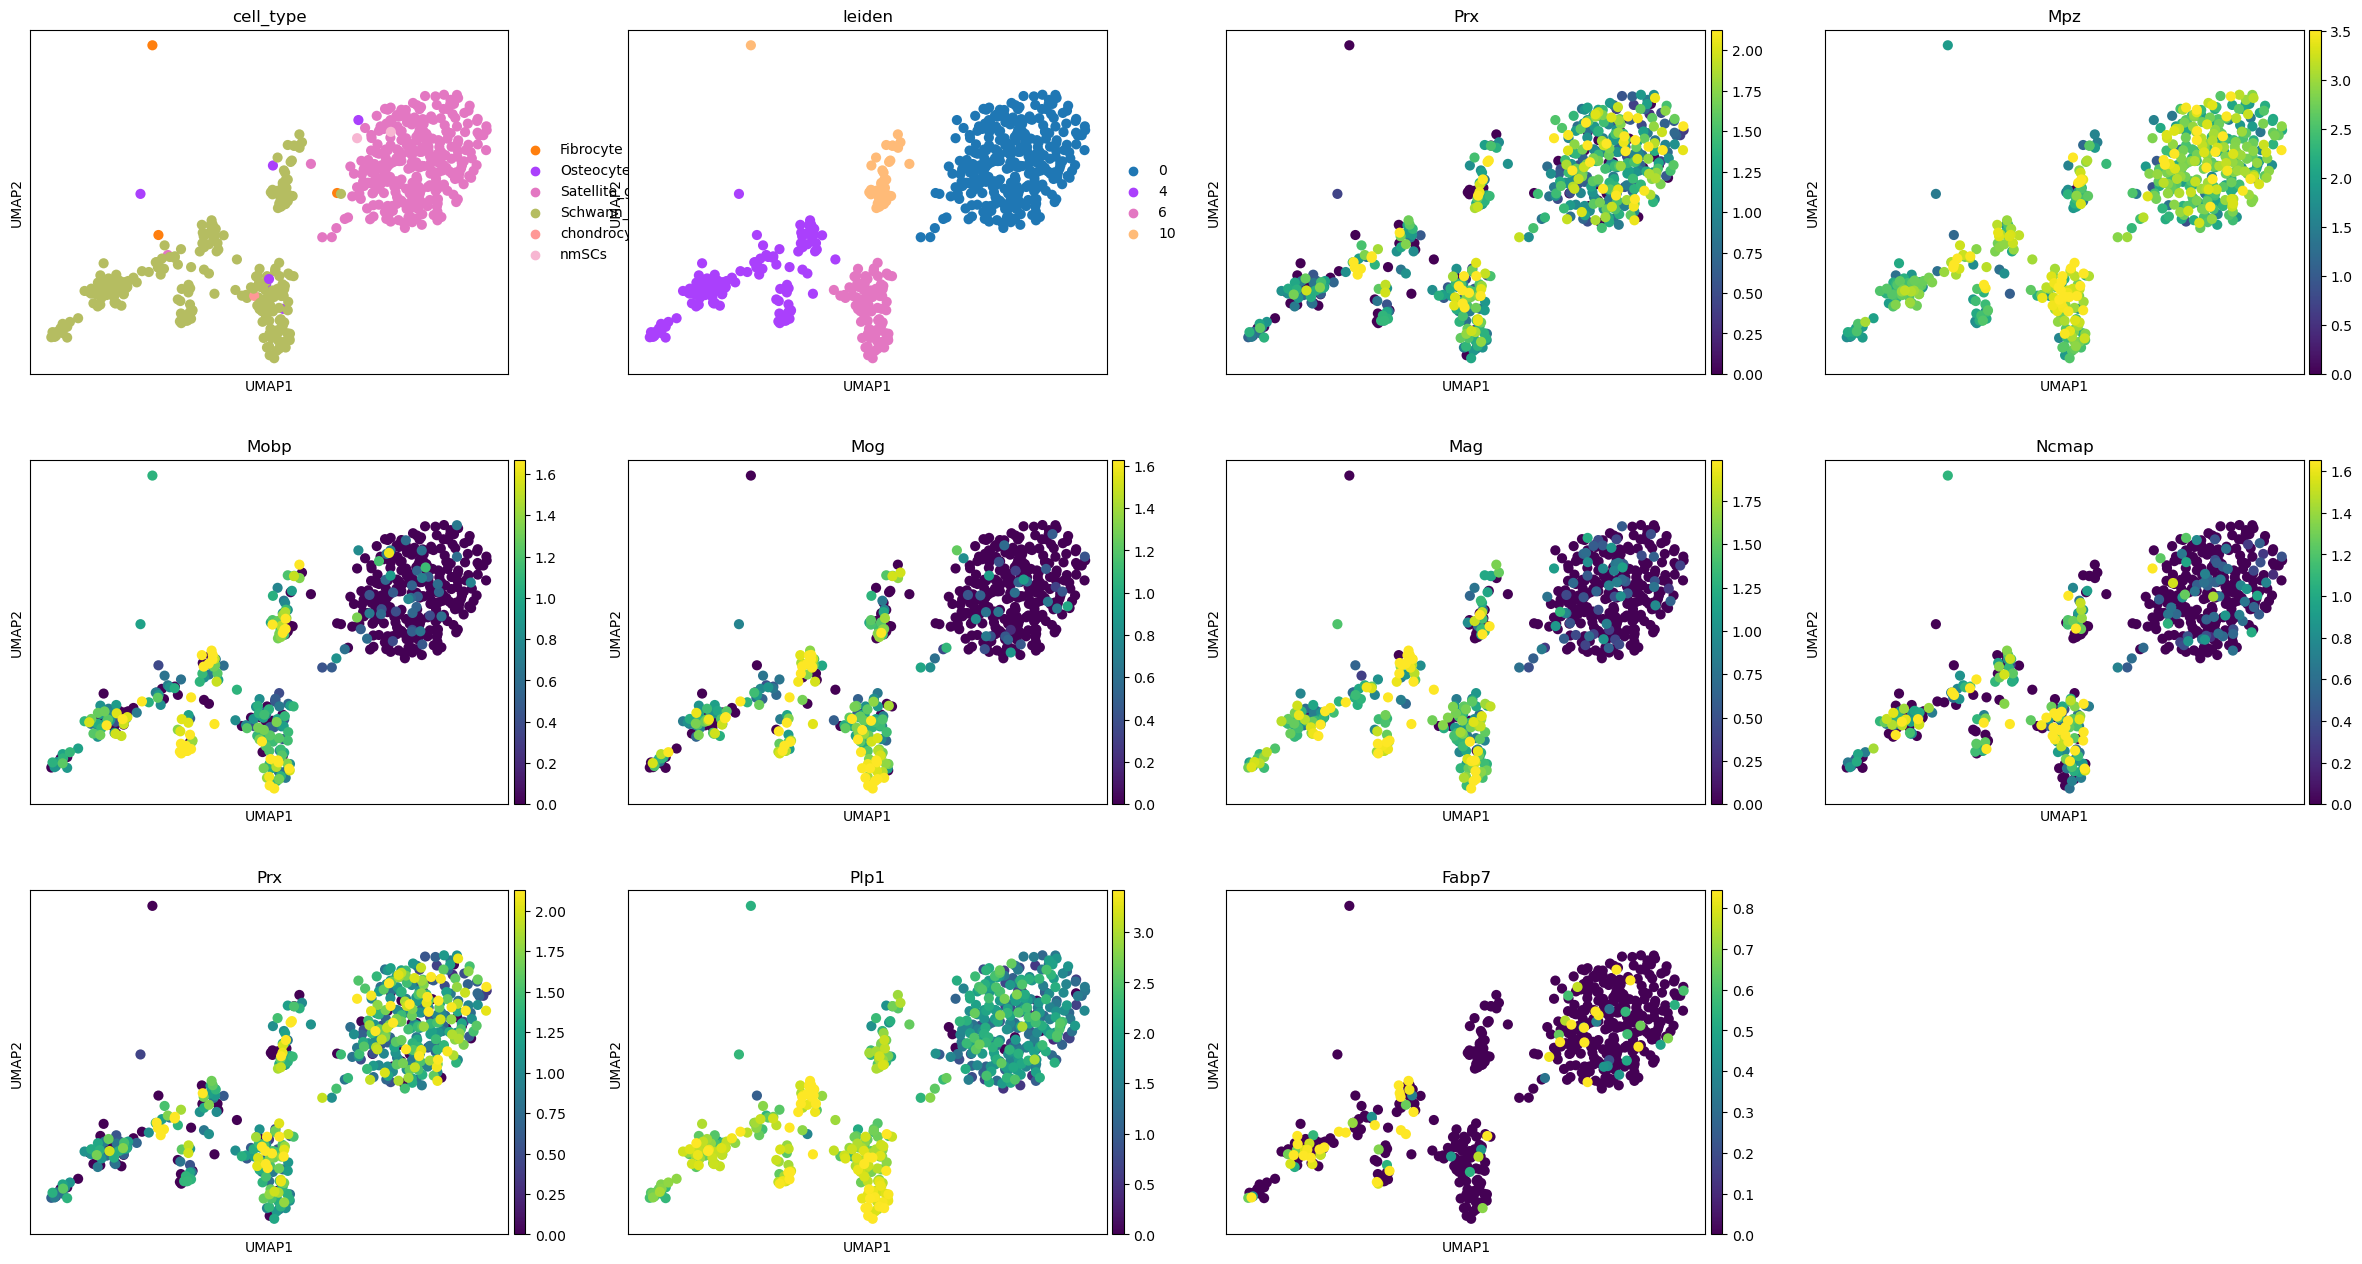

In [154]:
# Subset the data to include only clusters 4, 10, and 6
#clusters_to_analyze = ['4', '10', '6','0']
#subset_adata = known_cluster_modified_2[known_cluster_modified_2.obs['leiden_2'].isin(clusters_to_analyze)].copy()

sc.pl.umap(subset_adata,color=['cell_type','leiden','Prx','Mpz','Mobp','Mog','Mag','Ncmap','Prx','Plp1','Fabp7'],layer='log1p',vmax='p95')


In [155]:
subset_adata

[Executed on 2023-10-26 13:11:16.105929]


AnnData object with n_obs × n_vars = 560 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6'
    var: 'mean', 'std', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1'
    uns: 'cell_type_colors', 'leiden', 'leiden_2_colors', 'leiden_colors', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-10-26 12:47:47.889618]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


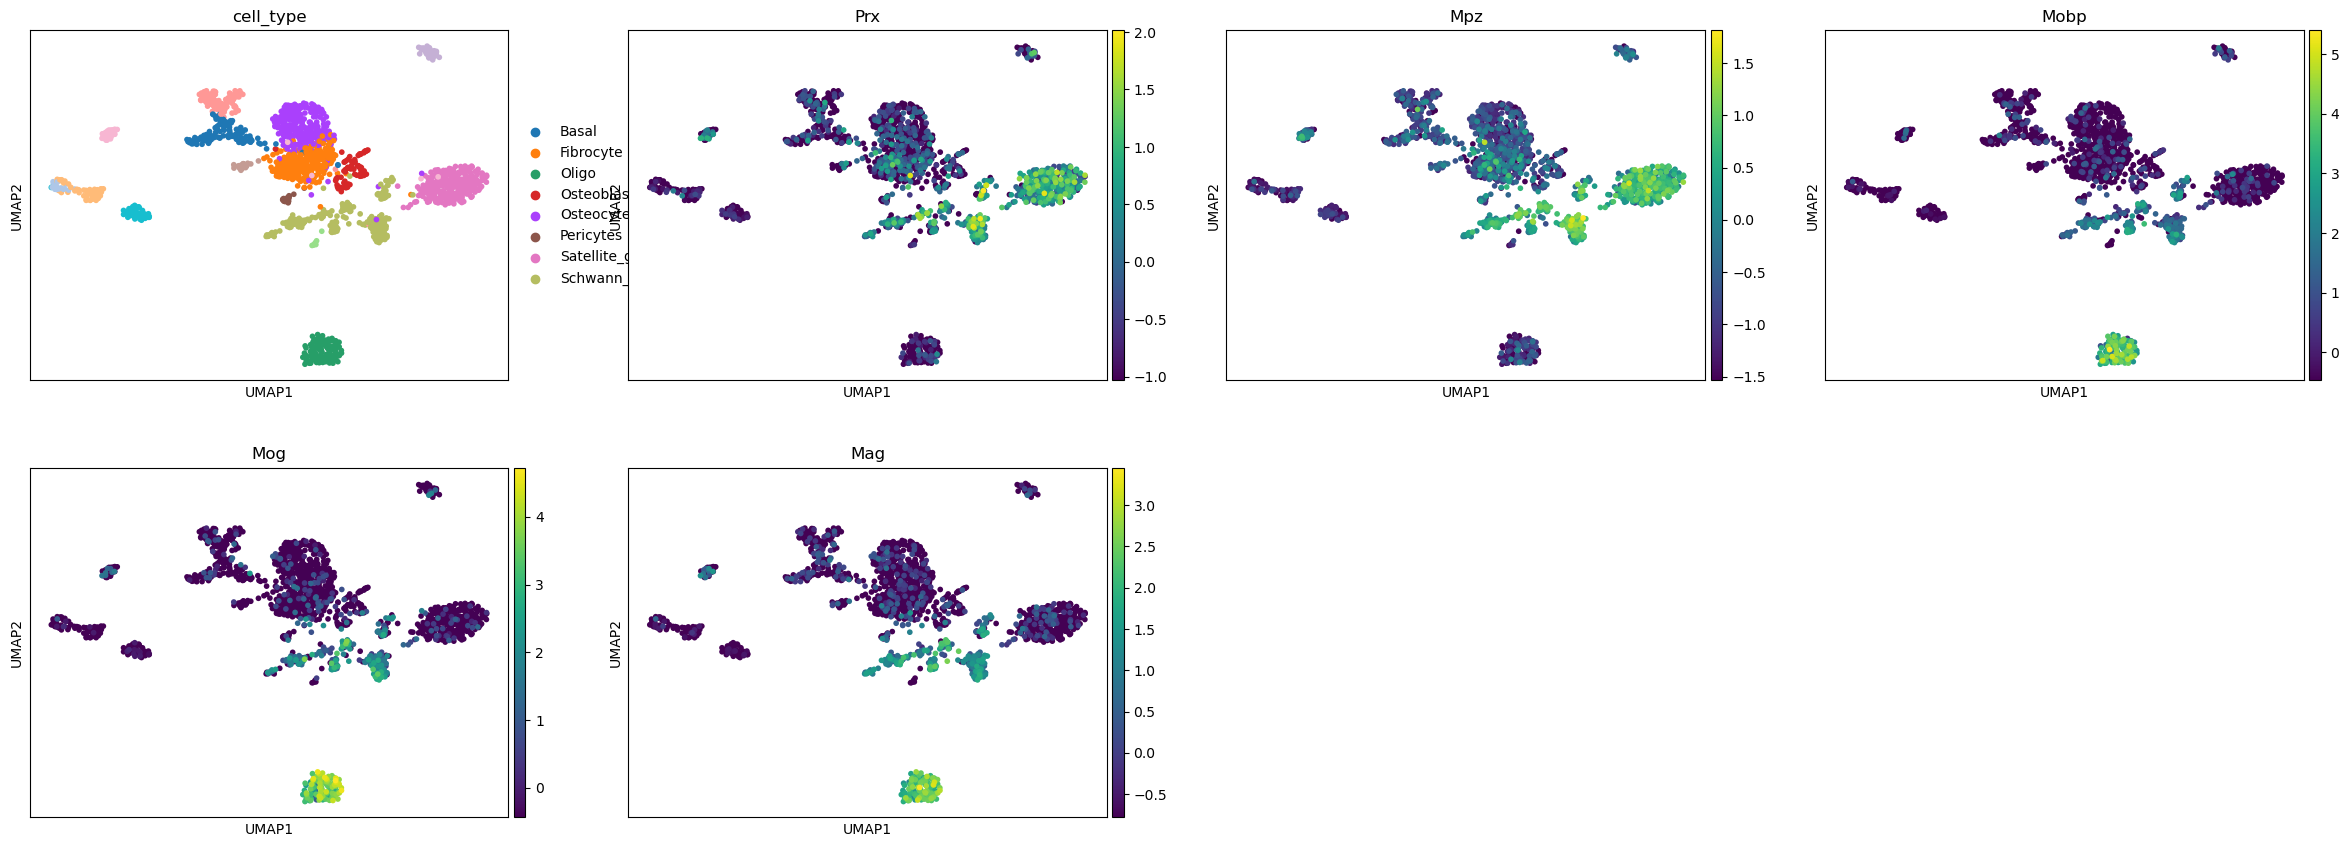

In [145]:
sc.pl.umap(known_cluster_modified_2,color=['cell_type','Prx','Mpz','Mobp','Mog','Mag'])

In [118]:
#change nan to nmSCs
known_cluster_modified_2.obs['leiden_2'].replace({'7,1':'16'},inplace=True)
known_cluster_modified_2.obs['leiden_2'].replace({'7,0':'7'},inplace=True)

[Executed on 2023-10-26 12:23:22.844806]


In [116]:
known_cluster_modified_2.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_repca_with_modified_2.h5ad")

[Executed on 2023-10-26 12:21:20.637954]


In [126]:
known_cluster=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_repca_with_modified_2.h5ad")

[Executed on 2023-10-26 12:35:28.136886]


[Executed on 2023-10-26 12:45:08.547314]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


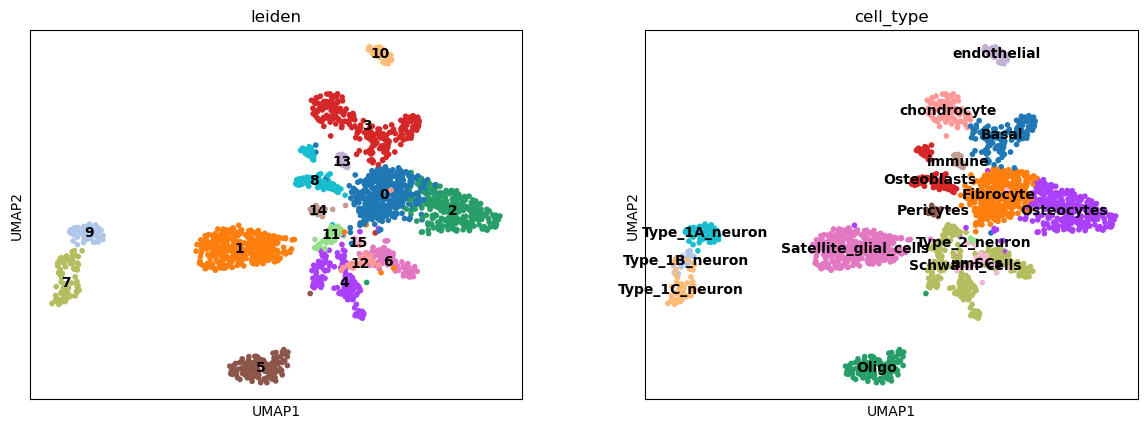

In [143]:
sc.pl.umap(known_cluster_modified,color=['leiden','cell_type'],legend_loc='on data')

In [ ]:
# Subset the data to include only clusters 4, 10, and 6
clusters_to_analyze = ['4', '10', '6']
subset_adata = known_cluster_modified_2[known_cluster_modified_2.obs['leiden_2'].isin(clusters_to_analyze)].copy()


[Executed on 2023-10-26 13:14:47.886495]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


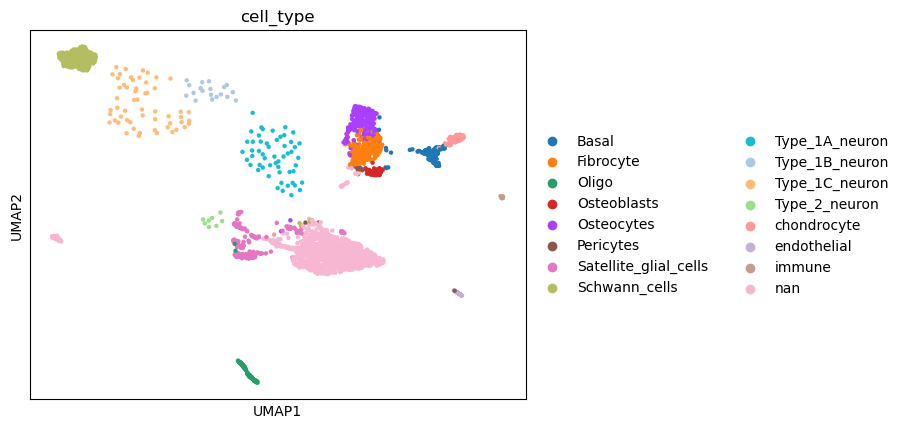

In [157]:
sc.pl.umap(adata,color=['cell_type'],layer='log1p',vmax='p95')

[Executed on 2023-10-26 13:15:35.851411]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


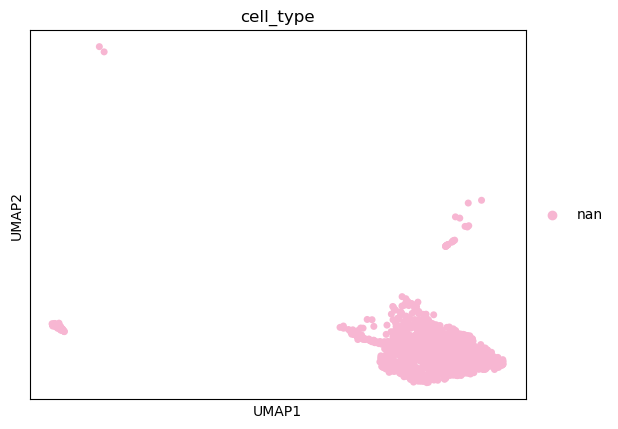

In [158]:
adata_new=adata[adata.obs['cell_type'].isin(['nan'])]
sc.pl.umap(adata_new,color=['cell_type'],layer='log1p',vmax='p95')

In [159]:
adata_new

[Executed on 2023-10-26 13:15:52.463161]


View of AnnData object with n_obs × n_vars = 1182 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'Scn7a_expression'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'leiden_new_colors', 'leiden_old_colors', 'leiden_sub_colors', 'log1p', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

In [161]:
var_names = known_cluster_modified.var_names.intersection(adata_new.var_names)
adata_ref = known_cluster_modified[:, var_names]
adata_new = adata_new[:, var_names]

[Executed on 2023-10-26 13:19:41.131037]


In [162]:
sc.pp.pca(known_cluster_modified)
sc.pp.neighbors(known_cluster_modified)
sc.tl.umap(known_cluster_modified)

[Executed on 2023-10-26 13:19:48.952915]


In [163]:
sc.tl.ingest(adata_new, known_cluster_modified, obs='leiden')

[Executed on 2023-10-26 13:27:45.872198]


In [164]:
known_cluster_modified

[Executed on 2023-10-26 13:31:16.196109]


AnnData object with n_obs × n_vars = 1796 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6'
    var: 'mean', 'std', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1'
    uns: 'cell_type_colors', 'leiden', 'leiden_2_colors', 'leiden_colors', 'neighbors', 'leiden_no_osteocytes_colors', 'rank_genes_groups', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

In [165]:
adata_new.uns['leiden_colors'] = known_cluster_modified.uns['leiden_colors']

[Executed on 2023-10-26 13:31:55.306042]


[Executed on 2023-10-26 13:32:55.991539]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


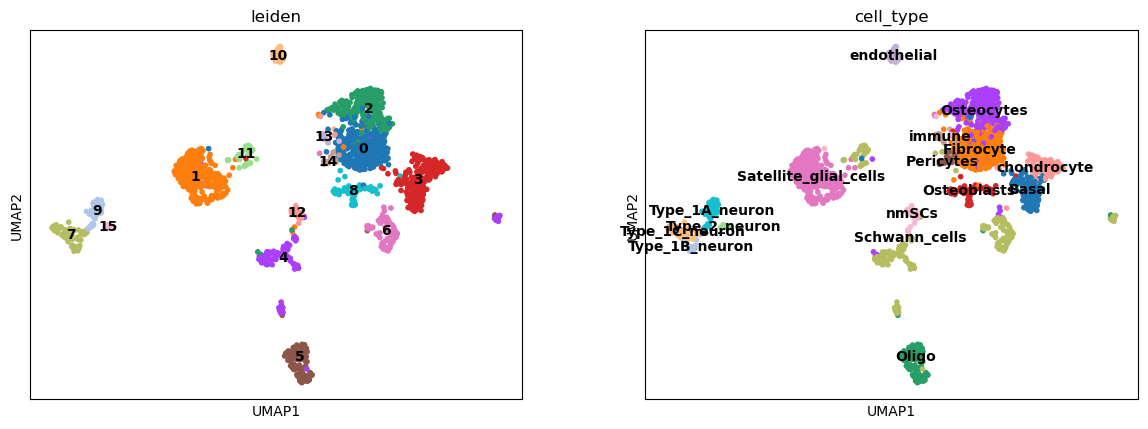

In [168]:
sc.pl.umap(known_cluster_modified,color=['leiden','cell_type'],legend_loc='on data')

[Executed on 2023-10-26 13:35:00.092225]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


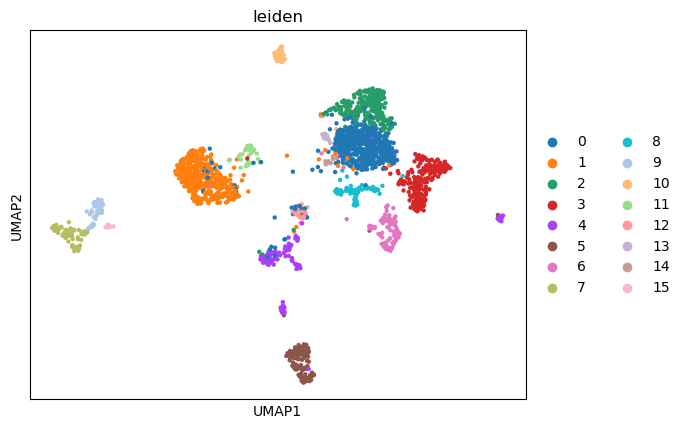

In [170]:
known_cluster_modified_concat=known_cluster_modified.concatenate(adata_new)
sc.pl.umap(known_cluster_modified_concat,color='leiden')

[Executed on 2023-10-26 13:35:41.696858]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


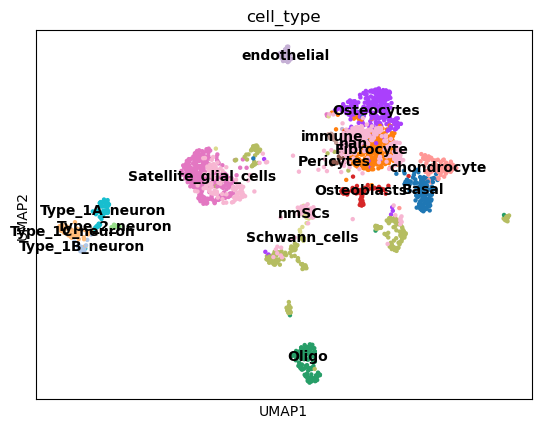

In [172]:
sc.pl.umap(known_cluster_modified_concat,color='cell_type',legend_loc='on data')

[Executed on 2023-10-26 13:36:15.427802]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


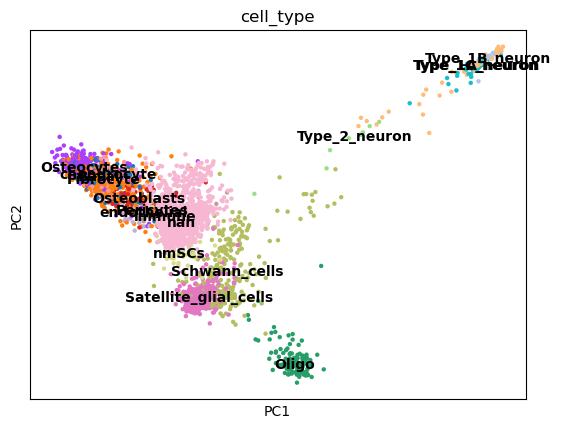

In [173]:
sc.pl.pca(known_cluster_modified_concat,color='cell_type',legend_loc='on data')

[Executed on 2023-10-26 13:37:39.803290]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


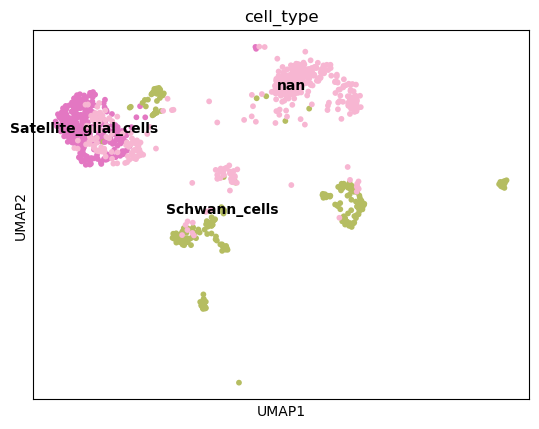

In [174]:
known_cluster_modified_concat=known_cluster_modified_concat[known_cluster_modified_concat.obs['cell_type'].isin(['nan','Schwann_cells','Satellite_glial_cells'])]

sc.pl.umap(known_cluster_modified_concat,color='cell_type',legend_loc='on data')

[Executed on 2023-10-26 13:38:55.312224]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


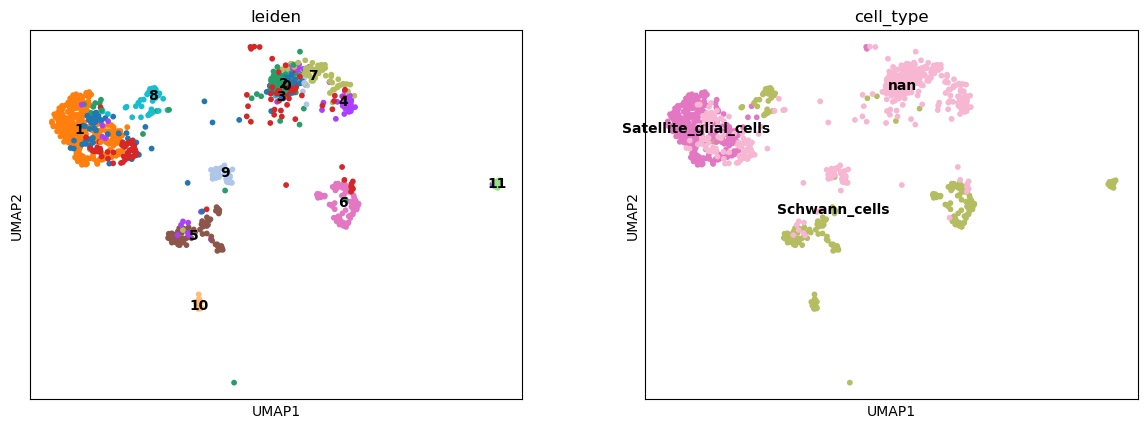

In [176]:
sc.pp.neighbors(known_cluster_modified_concat)
sc.tl.leiden(known_cluster_modified_concat,resolution=0.5)
sc.pl.umap(known_cluster_modified_concat,color=['leiden','cell_type'],legend_loc='on data')

In [177]:
known_cluster_modified_concat.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_known_cluster_modified_concat.h5ad")

[Executed on 2023-10-26 13:44:37.053233]


[Executed on 2023-10-26 13:45:24.204628]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


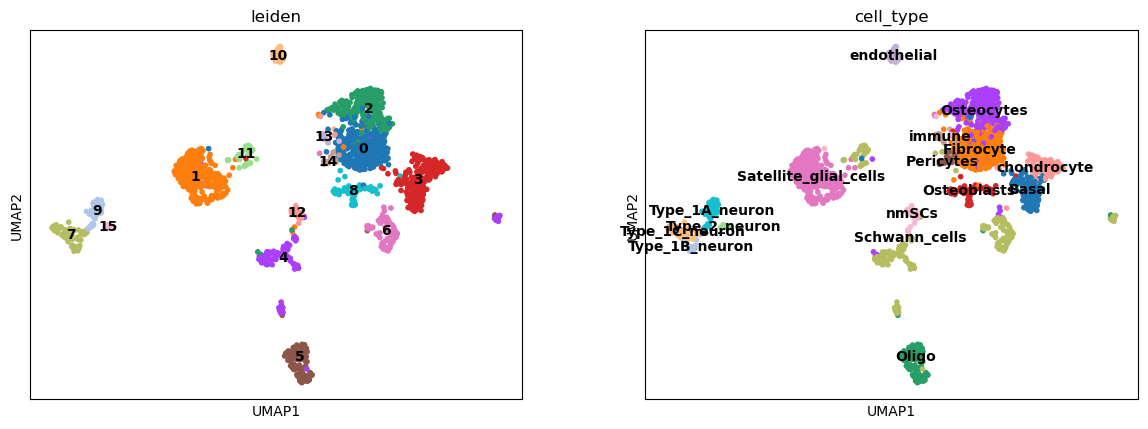

In [178]:
sc.pl.umap(known_cluster_modified,color=['leiden','cell_type'],legend_loc='on data')

[Executed on 2023-10-26 14:24:58.568523]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


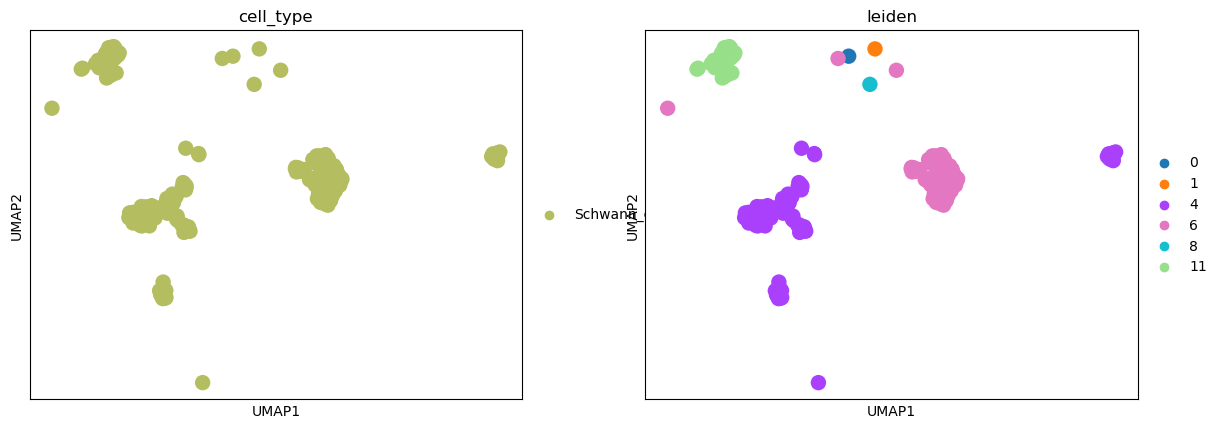

In [5]:
schwann=known_cluster_modified[known_cluster_modified.obs['cell_type'].isin(['Schwann_cells'])]
sc.pl.umap(schwann,color=['cell_type','leiden'])

[Executed on 2023-10-26 14:25:09.258965]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packag

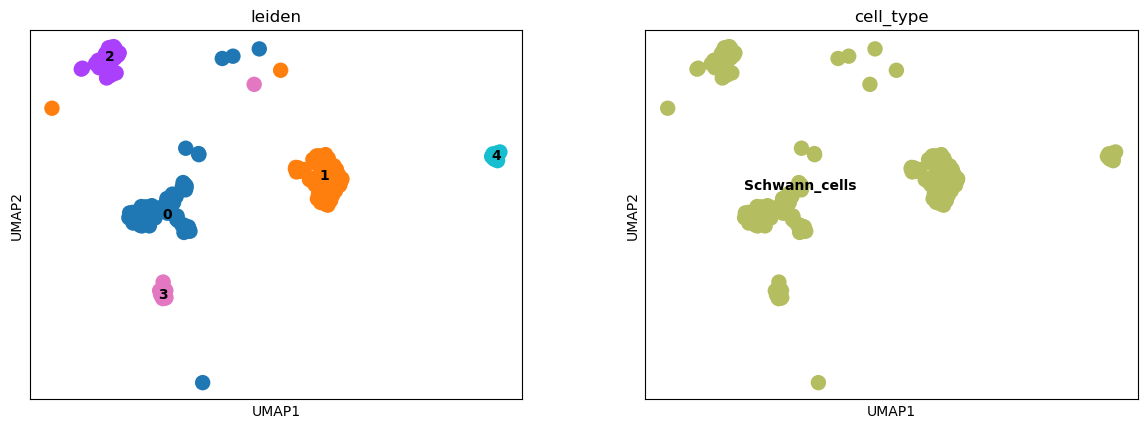

In [6]:
sc.pp.neighbors(schwann)
sc.tl.leiden(schwann,resolution=0.1)
sc.pl.umap(schwann,color=['leiden','cell_type'],legend_loc='on data')

In [7]:
sc.tl.rank_genes_groups(schwann, groupby='leiden', method='wilcoxon')


[Executed on 2023-10-26 14:26:07.873495]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2

In [19]:
sc.get.rank_genes_groups_df(schwann,'0').head(10)

[Executed on 2023-10-26 15:14:13.016703]


names     scores  logfoldchanges         pvals     pvals_adj
0    Fgf12  10.050425        5.289908  9.147255e-24  3.040639e-19
1     Etl4   9.639668             NaN  5.436395e-22  9.035560e-18
2  Gm27000   9.356451             NaN  8.246002e-21  9.136845e-17
3     Meg3   9.105120        2.418270  8.617111e-20  6.191831e-16
4    Kcnq4   9.096680        7.224340  9.313544e-20  6.191831e-16
5    Kcnc2   8.011642        4.483790  1.131862e-15  6.270703e-12
6    Calb1   7.974131        9.570923  1.534570e-15  7.287235e-12
7   Prune2   7.926303        2.785314  2.257666e-15  9.380885e-12
8  Zfp804a   7.908484        3.979299  2.605408e-15  9.622931e-12
9   Adgrb1   7.762187             NaN  8.347687e-15  2.774855e-11

[Executed on 2023-10-26 15:15:00.073129]


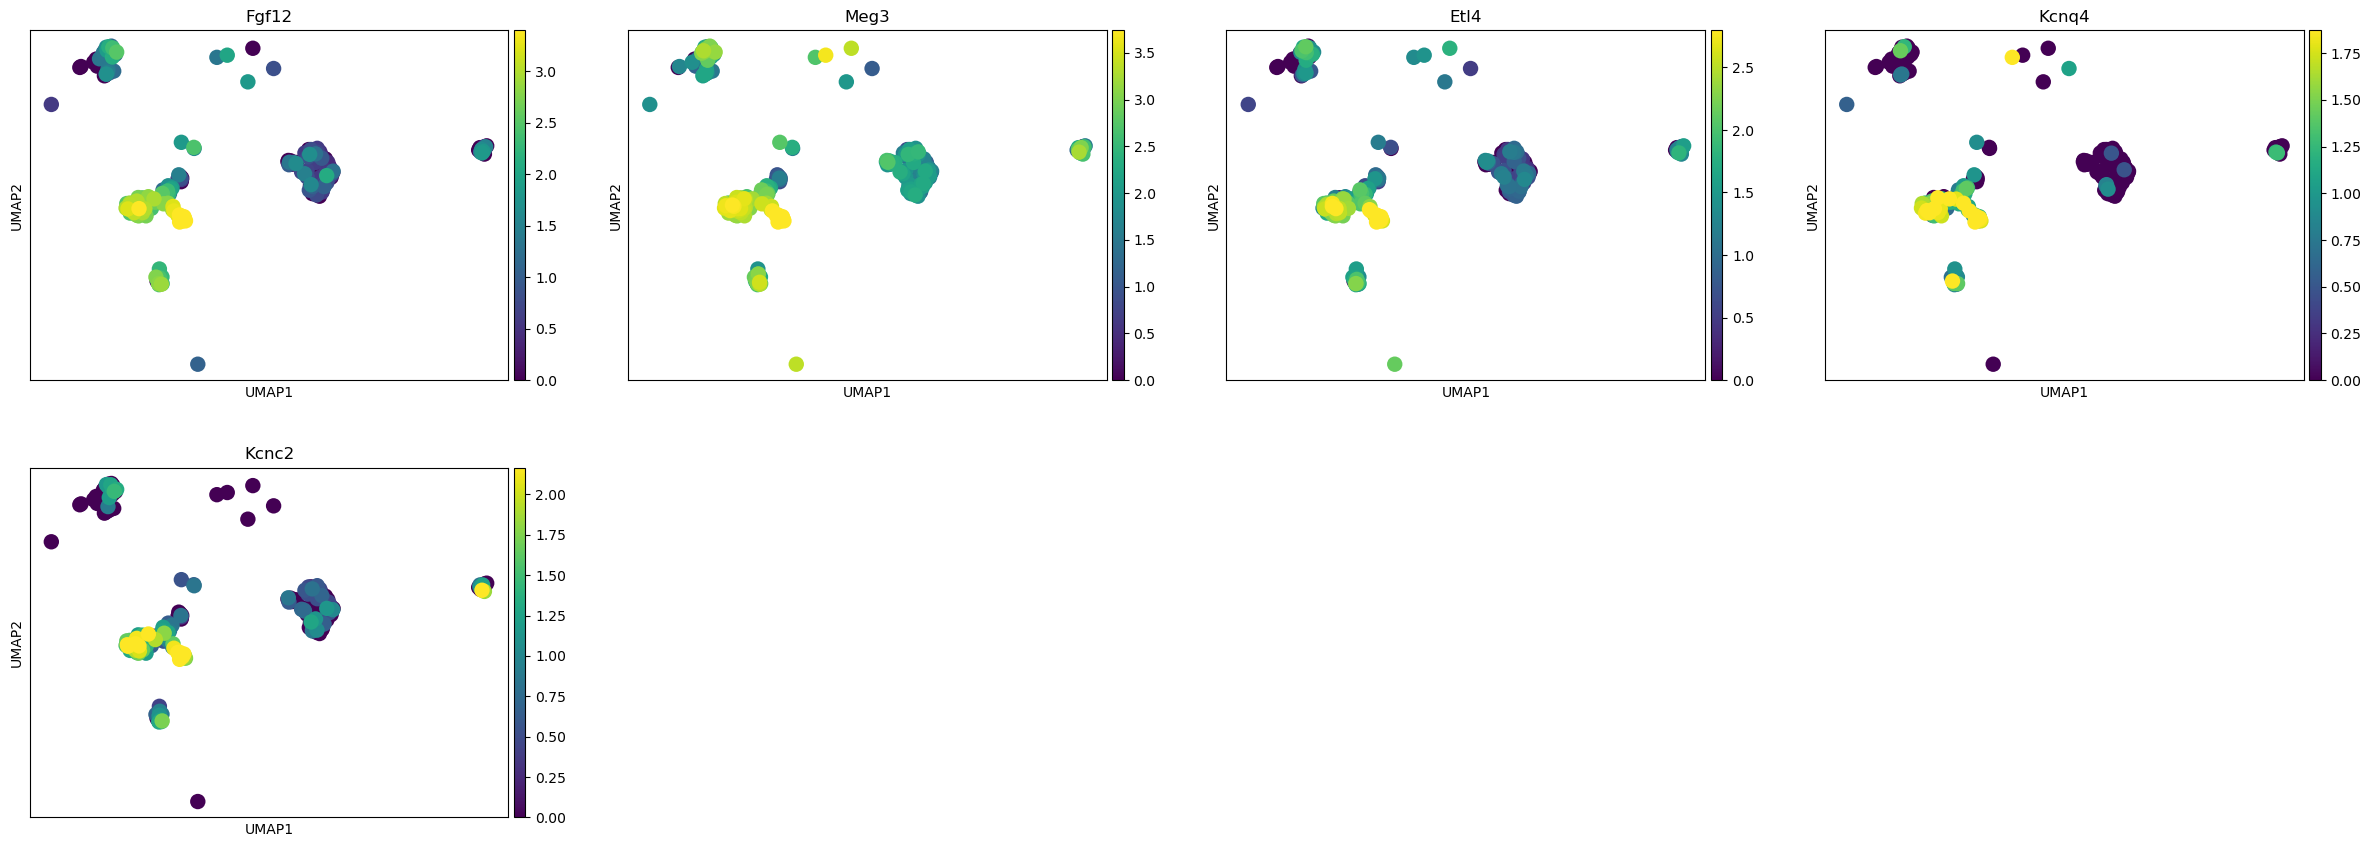

In [22]:
sc.pl.umap(schwann,color=['Fgf12','Meg3','Etl4','Kcnq4','Kcnc2'],layer='log1p',vmax='p95')

[Executed on 2023-10-26 14:37:21.628044]


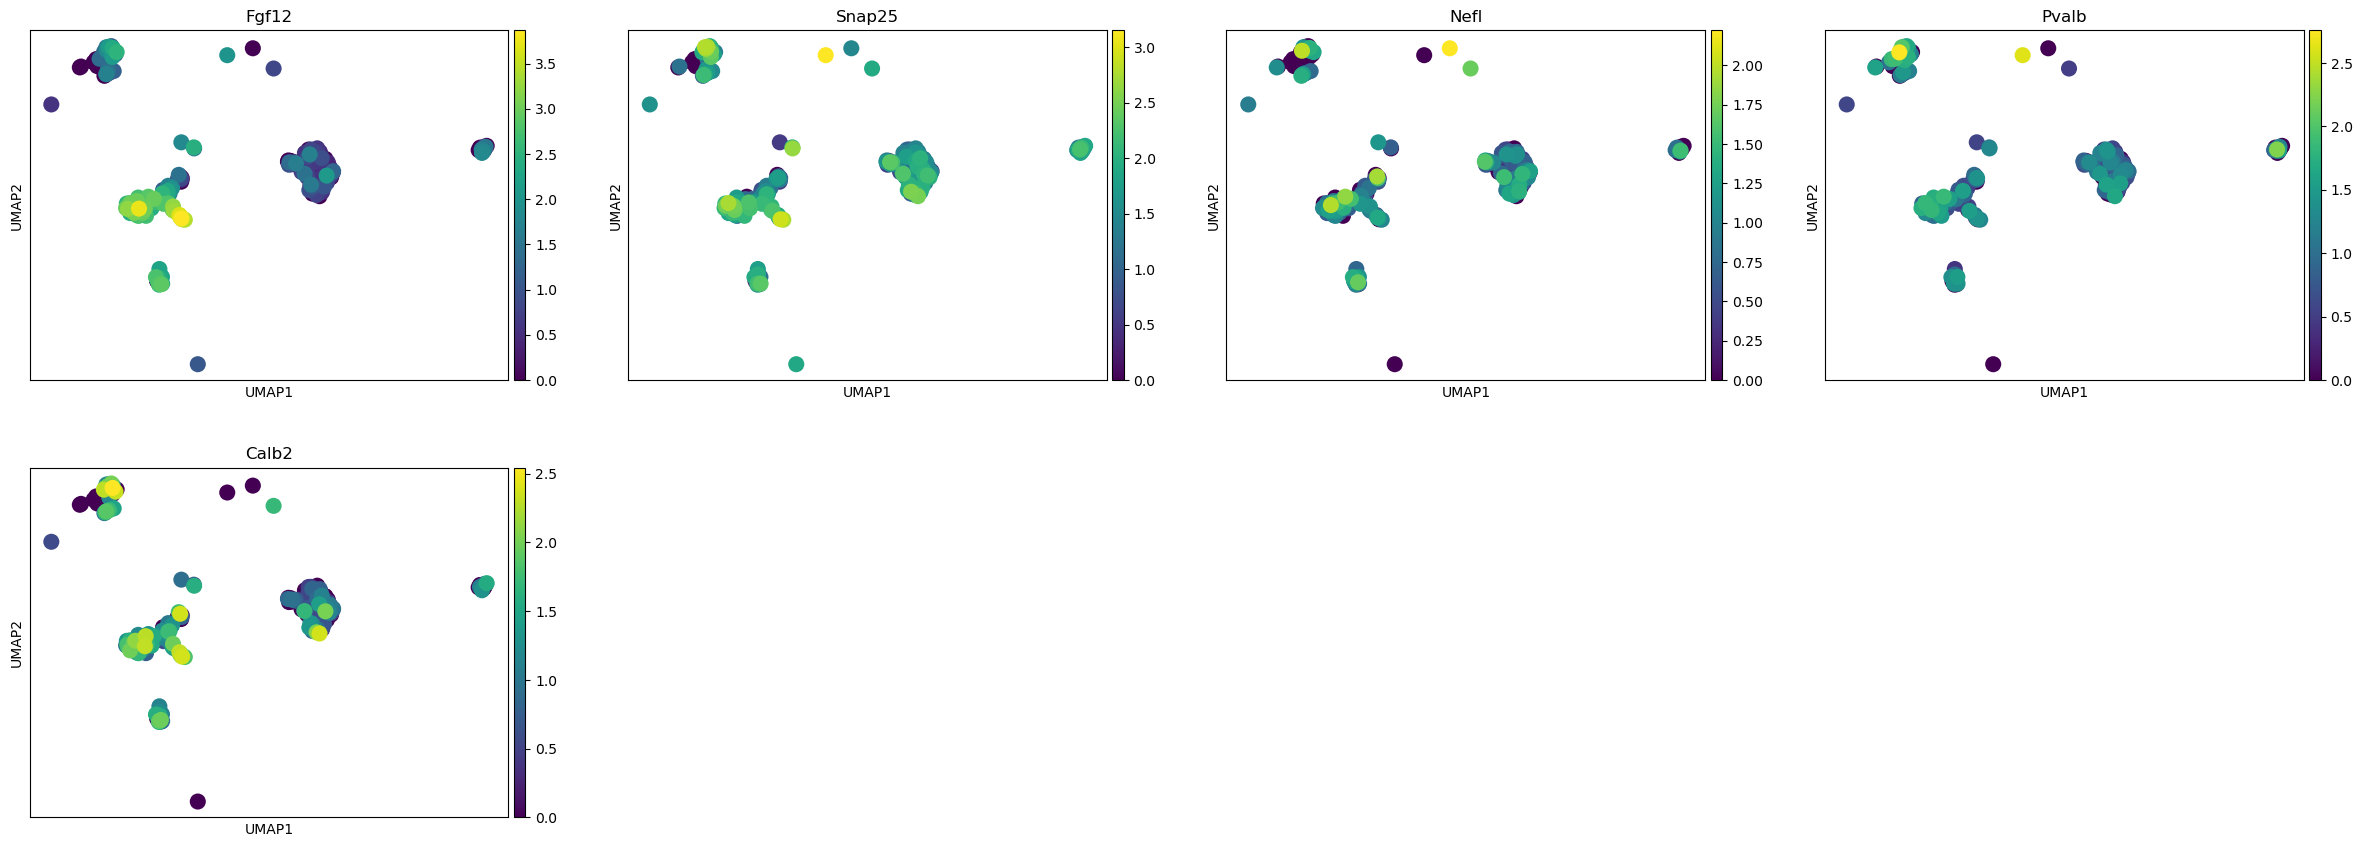

In [15]:
# Assuming 'log1p' layer contains log-transformed expression values
snap25_threshold = 2
nefl_threshold = 1.2

# Calculate the expression values for SNAP25 and Nefl
snap25_expression = schwann.layers['log1p'][:, schwann.var_names == 'Snap25']
nefl_expression = schwann.layers['log1p'][:, schwann.var_names == 'Nefl']

# Identify cells that meet the criteria for both SNAP25 and Nefl expression
cells_to_remove = (
    (snap25_expression > snap25_threshold) &
    (nefl_expression > nefl_threshold)
)

# Create a new filtered AnnData object that excludes the identified cells
filtered_schwann = schwann[~cells_to_remove].copy()

sc.pl.umap(filtered_schwann,color=['Fgf12','Snap25','Nefl','Pvalb','Calb2'],layer='log1p')

In [18]:
filtered_schwann

[Executed on 2023-10-26 14:38:16.884522]


AnnData object with n_obs × n_vars = 224 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6'
    var: 'mean', 'std', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1'
    uns: 'cell_type_colors', 'leiden', 'leiden_2_colors', 'leiden_no_osteocytes_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-10-26 14:38:04.069958]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


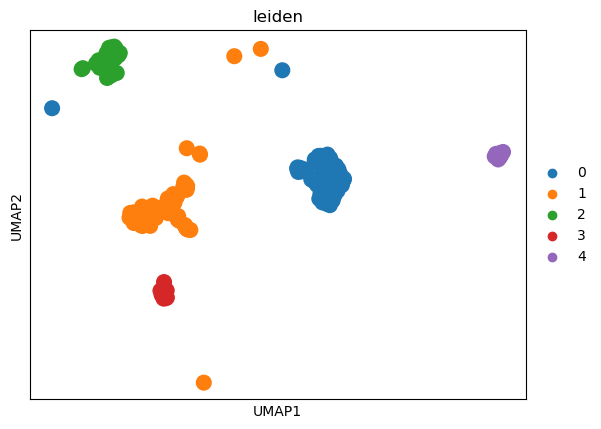

In [17]:
sc.tl.leiden(filtered_schwann,resolution=0.1)
sc.pl.umap(filtered_schwann,color='leiden')

In [187]:
schwann.obs['leiden'].value_counts()

[Executed on 2023-10-26 13:49:53.604037]


leiden
0    91
1    82
2    36
3    19
4    16
Name: count, dtype: int64

In [188]:
schwann

[Executed on 2023-10-26 13:50:00.943531]


AnnData object with n_obs × n_vars = 244 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6'
    var: 'mean', 'std', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1'
    uns: 'cell_type_colors', 'leiden', 'leiden_2_colors', 'leiden_colors', 'neighbors', 'leiden_no_osteocytes_colors', 'rank_genes_groups', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-10-26 13:50:43.822255]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


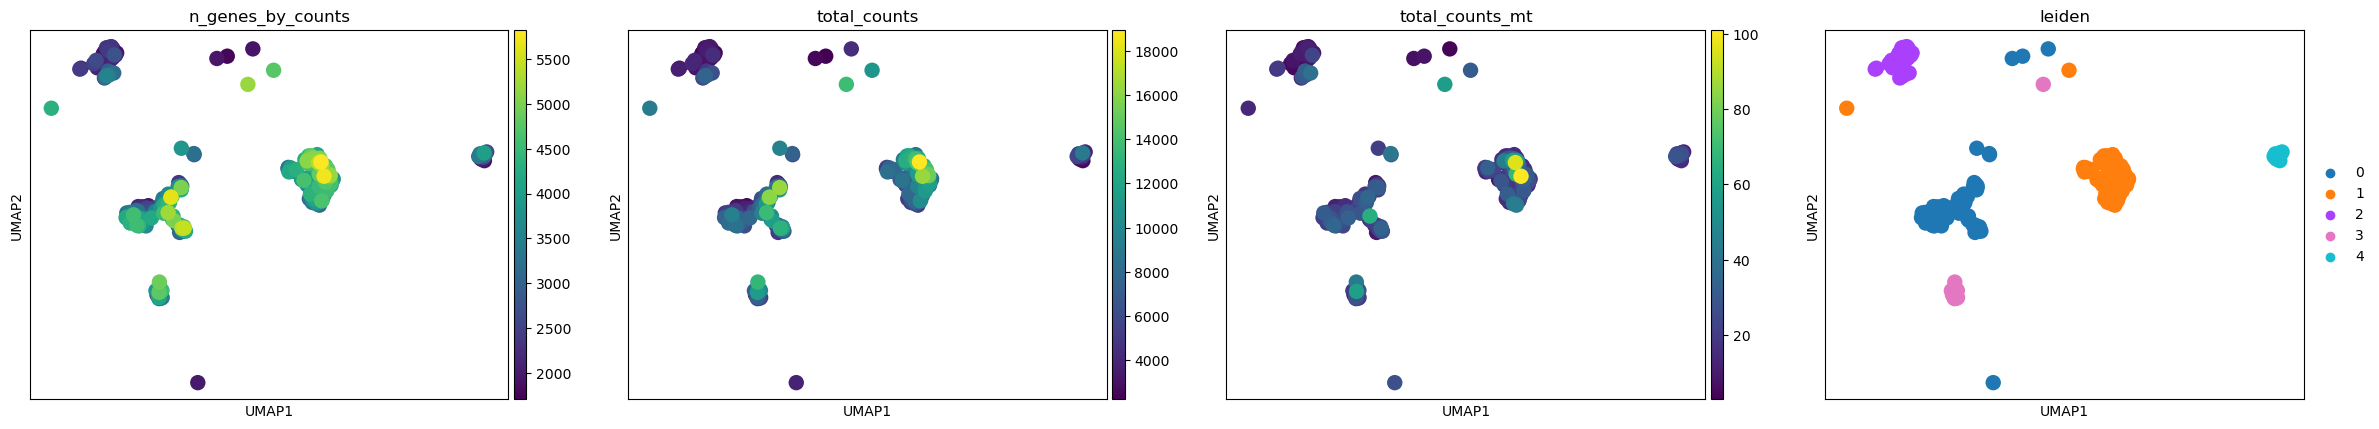

In [190]:
sc.pl.umap(schwann,color=['n_genes_by_counts','total_counts','total_counts_mt','leiden'])

[Executed on 2023-10-26 13:51:32.693860]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


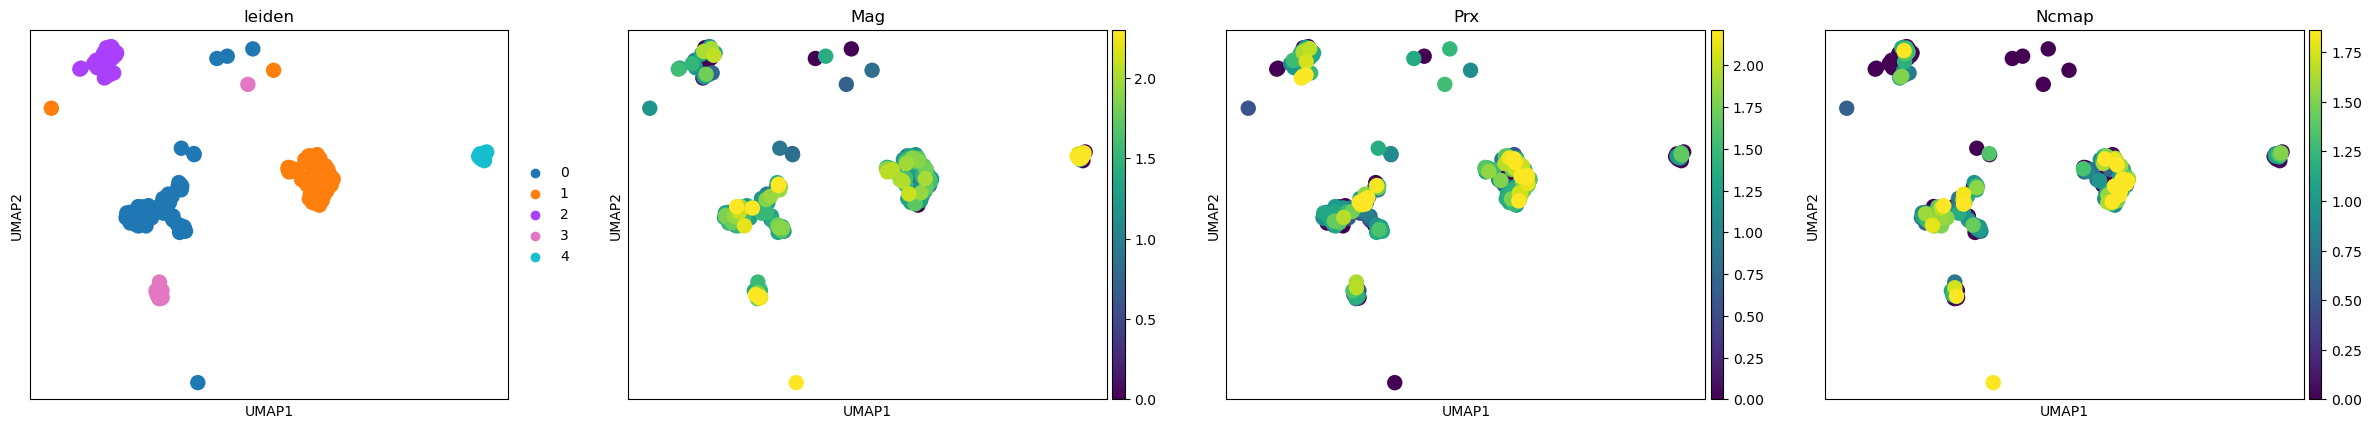

In [192]:
sc.pl.umap(schwann,color=['leiden','Mag','Prx','Ncmap'],layer='log1p',vmax='p95')